<center>
<img src="https://wpsovet.ru/wp-content/uploads/1/6/4/1642a836ada1355f35ef577d9024a728.jpg" width="700"> 

# Андан на экономе: домашнее задание 2
</center>

**ФИО:** Парамонов Всеволод Антонович

**id из контеста:** dap_econ_2022_278

**Внимание, конкурс!** 

Напиши свой любимый анекдот. Аcсисты и семенаристы устроют голосование. Лучшая тройка получит по бонусному баллу.

**Место для аника:**

## Общая информация


__Дата выдачи:__ 06.03.2023

__Мягкий дедлайн:__ 23:59MSK 02.04.2022

__Жесткий дедлайн:__ 23:59MSK 09.04.2022

## Оценивание и штрафы

Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 100 баллов. За каждый день просрочки после мягкого дедлайна снимается 10 баллов. После жёсткого дедлайна работы не принимаются. Даже при опозданиии на одну секунду. Сдавайте работы заранее.

Мягкий дедлайн можно отодвинуть без потери баллов на 1,2 или 3 дня. Суммарно для откладывания в запасе есть три дня. Можно отодвинуть один дедлайн на три дня, а можно три дедлайна подвинуть на один день. Распоряжаться этими днями студент может как угодно. Жёсткий дедлайн, при этом, не меняется. Если такое произошло, нужно сообщить о сдвиге при сдаче работы.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов. Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Любой из студентов может быть вызван на защиту любого домашнего задания. В таком случае итоговая оценка студента определяется в результате защиты.

> За отсутствие названий графиков и подписей к осям могут снижаться баллы. Все картинки должны быть самодостаточны и визуально удобны для восприятия, так чтобы не нужно было смотреть ваш код или знать задание, чтобы понять что на них изображено. Выводы должны быть релевантными. Не забывайте их писать. Если в вопросе требуется ответ словами, а его нет, вы будете терять довольно много баллов.

## Формат сдачи

Сам ноутбук называйте в формате hw-02-NUM-USERNAME.ipynb, где NUM — номер из вашего логина, а USERNAME — ваши фамилия и имя. Файл сдаётся в anytask.

Если хотите, можете разбить тетрадку на несколько разных для своего удобства.

In [600]:
import numpy as np
import pandas as pd

import scipy.stats as sts
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
from IPython.display import display_html, HTML, YouTubeVideo
from collections import Counter

import yfinance as yf
import riskfolio as rp

import ipywidgets

import plotly.io as pio
pio.renderers.default = 'notebook' 


### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

# Часть 1: рисковая 

В этом задании мы немного поработаем с ценами на акции. За задание можно получить $50$ баллов.

В табличке `prices.tsv` лежат данные о том, как менялась цена на акции из индексов [S&P-500](https://ru.wikipedia.org/wiki/S%26P_500), [NASDAQ-100](https://ru.wikipedia.org/wiki/Nasdaq-100) и [DJI](https://ru.wikipedia.org/wiki/Промышленный_индекс_Доу_—_Джонса) в течение последних $10$ лет. В табличке `information.tsv` лежит дополнительная полезная информация по ценным бумагам. Подгрузим эти таблицы и посмотрим на них. 

In [601]:
df_prices = pd.read_csv('/Users/vsevolod/Downloads/price.tsv', sep='\t')
df_prices = df_prices.drop('GEHC', axis=1) # сликом молодая компания
print(df_prices.shape)
df_prices.head()

(2518, 521)


Date          A        AAL        AAP       AAPL       ABBV  \
0  2013-03-05 00:00:00  27.946215  13.245518  71.640678  13.298839  24.972109   
1  2013-03-06 00:00:00  28.326160  13.735741  70.923820  13.129805  25.125229   
2  2013-03-07 00:00:00  28.332716  13.971428  70.961044  13.281566  24.958796   
3  2013-03-08 00:00:00  28.188597  14.065701  71.538284  13.316731  24.858923   
4  2013-03-11 00:00:00  28.044483  14.263680  72.180695  13.506428  25.078619   

         ABC  ABNB        ABT       ACGL  ...        XOM       XRAY  \
0  41.335518   NaN  28.678448  16.563334  ...  58.596577  39.023003   
1  41.515339   NaN  28.347576  16.583332  ...  58.563908  39.283100   
2  41.172813   NaN  28.479918  16.813334  ...  58.008087  39.515335   
3  41.515339   NaN  28.686729  16.879999  ...  58.178085  39.701115   
4  41.575287   NaN  28.893517  16.940001  ...  58.302341  39.812572   

         XYL        YUM        ZBH       ZBRA       ZION  ZM  ZS        ZTS  
0  24.914204  39.376095  67.826096  44.869999  20.423979 NaN NaN  31.940346  
1  25.693598  39.738384  67.343094  44.790001  20.907482 NaN NaN  31.530493  
2  24.870417  39.940308  66.985306  44.619999  21.057535 NaN NaN  32.191845  
3  24.896696  40.219440  67.441467  45.040001  21.090885 NaN NaN  31.754053  
4  25.185684  40.290707  67.745613  45.470001  21.365984 NaN NaN  31.837889  

[5 rows x 521 columns]

In [602]:
df_inf = pd.read_csv('/Users/vsevolod/Downloads/information.tsv', sep='\t')
print(df_inf.shape)
df_inf.head()

(525, 12)


Symbol                  Security SEC filings             GICS Sector  \
0      A  Agilent Technologies Inc     reports             Health Care   
1    AAL   American Airlines Group     reports             Industrials   
2    AAP        Advance Auto Parts     reports  Consumer Discretionary   
3   AAPL                Apple Inc.     reports  Information Technology   
4   ABBV               AbbVie Inc.     reports             Health Care   

                            GICS Sub Industry    Headquarters Location  \
0                       Health Care Equipment  Santa Clara, California   
1                                    Airlines        Fort Worth, Texas   
2                           Automotive Retail  Raleigh, North Carolina   
3  Technology Hardware, Storage & Peripherals    Cupertino, California   
4                             Pharmaceuticals  North Chicago, Illinois   

  Date first added        CIK  Founded  S&P-500  NASDAQ    DJI  
0         05.06.00  1090872.0   1999.0     True   False  False  
1         23.03.15     6201.0   1934.0     True   False  False  
2         09.07.15  1158449.0   1932.0     True   False  False  
3         30.11.82   320193.0   1977.0     True    True   True  
4         31.12.12  1551152.0   1888.0     True   False  False

## 1.1 Разогреваемся

__а) [0 баллов]__ В колонке `Date` лежит день, когда торговалась бумага. Сейчас у неё тип `string`. Превратите её в `datetime` и сделайте индексом таблицы.

In [603]:
df_prices['Date'] = pd.to_datetime(df_prices['Date'], utc=True)

df_prices.set_index('Date', inplace=True)

__б) [5 баллов]__ В колонках `'S&P-500', 'NASDAQ', 'DJI'` лежит True, если ценная бумага входит в соотвествующий индекс. Сколько ценных бумаг из таблицы входили в индекс NASDAQ? 

In [604]:
df_inf['Symbol'][df_inf['NASDAQ'] == True].count()

103

Сколько ценных бумаг входят во все три индекса сразу?

In [605]:
df_inf['Symbol'].loc[((df_inf['NASDAQ'] == True) & (df_inf['S&P-500'] == True) & (df_inf['DJI'] == True))].count()

5

В колонке `Founded` записан год основания компании. Сколько компаний из индекса S&P-500 были основаны в 19 веке (1900 год относится к 20 веку)? 

In [606]:
df_inf['Symbol'].loc[((df_inf['Founded'] >= 1801) & (df_inf['Founded'] < 1900)) & (df_inf['S&P-500'] == True)].count()

95

В колонке `GICS Sector` находится сектор экономики, в котором работает компания. Сколько всего уникальных секторов представлено в данных?

In [607]:
df_inf['GICS Sector'].nunique()

11

Таблица с информацией устаревшая. Есть тикеры, которые попали в таблицу с ценами, но не попали в таблицу с информацией. Сколько таких тикеров? 

In [608]:
len(np.setdiff1d(df_prices.columns.values, np.array(df_inf['Symbol'])))

58

__в) [5 баллов]__ Сколько компаний из индекса S&P-500 в сумме приходится на $3$ самых крупных сектора?

In [609]:
df_inf['GICS Sector'][df_inf['S&P-500'] == True].value_counts()[:3].sum()

210

__г) [5 баллов]__ Теперь поработаем со стоимостью акций. 

Выберите 5 случайных тикеров и постройте для них картинки с динамикой цен и гистограммы. Дайте ответы на вопросы:

- Распределение стоимости акций похоже на нормальное?
- Что происходило с финансовыми рынками в течение последних $10$ лет? Они росли? Они падали? Видно ли, что были кризисы? 

__Ответ:__

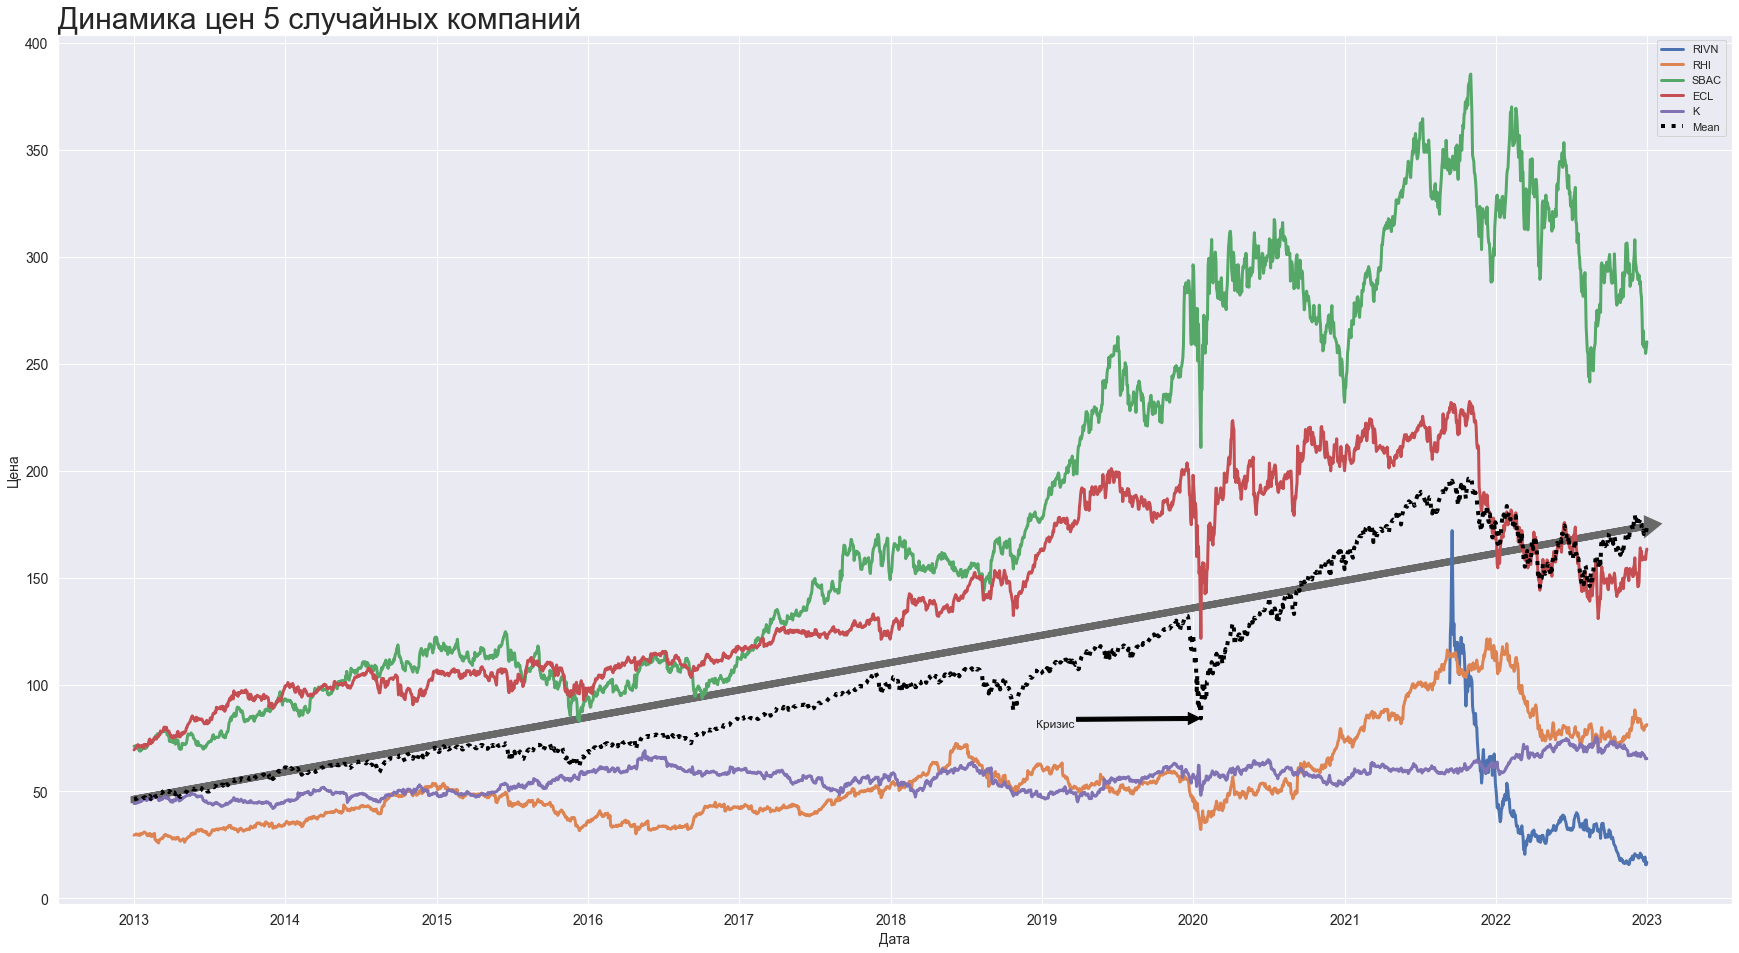

In [610]:
np.random.seed(4)

sample = df_prices[np.random.choice(df_prices.columns, 5, replace=False)].copy()
sample['Mean'] = df_prices.mean(axis=1).values


plt.figure(figsize=(30,16))
plt.title('Динамика цен 5 случайных компаний', fontsize=30, loc='left')

plt.plot(sample[sample.columns[:5]].values, linewidth=3)
plt.plot(sample['Mean'].values, color='black', linewidth=4, linestyle='dotted')

plt.legend(sample)

plt.arrow(0, sample['Mean'].values[0], len(sample), 
          sample['Mean'].values[-1] - sample['Mean'].values[0], 
          color='dimgray', linewidth=7 , head_width=5, head_length=14)

plt.annotate('Кризис',xy=(1774,84.174730),xytext=(1500,80),
             arrowprops={'linewidth':1, 'facecolor':"black", 'edgecolor':"black"})

plt.xticks(np.linspace(0,len(sample), 11), sample.index.year.unique(),fontsize=14)
plt.xlabel("Дата", fontsize=14)

plt.yticks(fontsize=14)
plt.ylabel("Цена", fontsize=14)

plt.show()


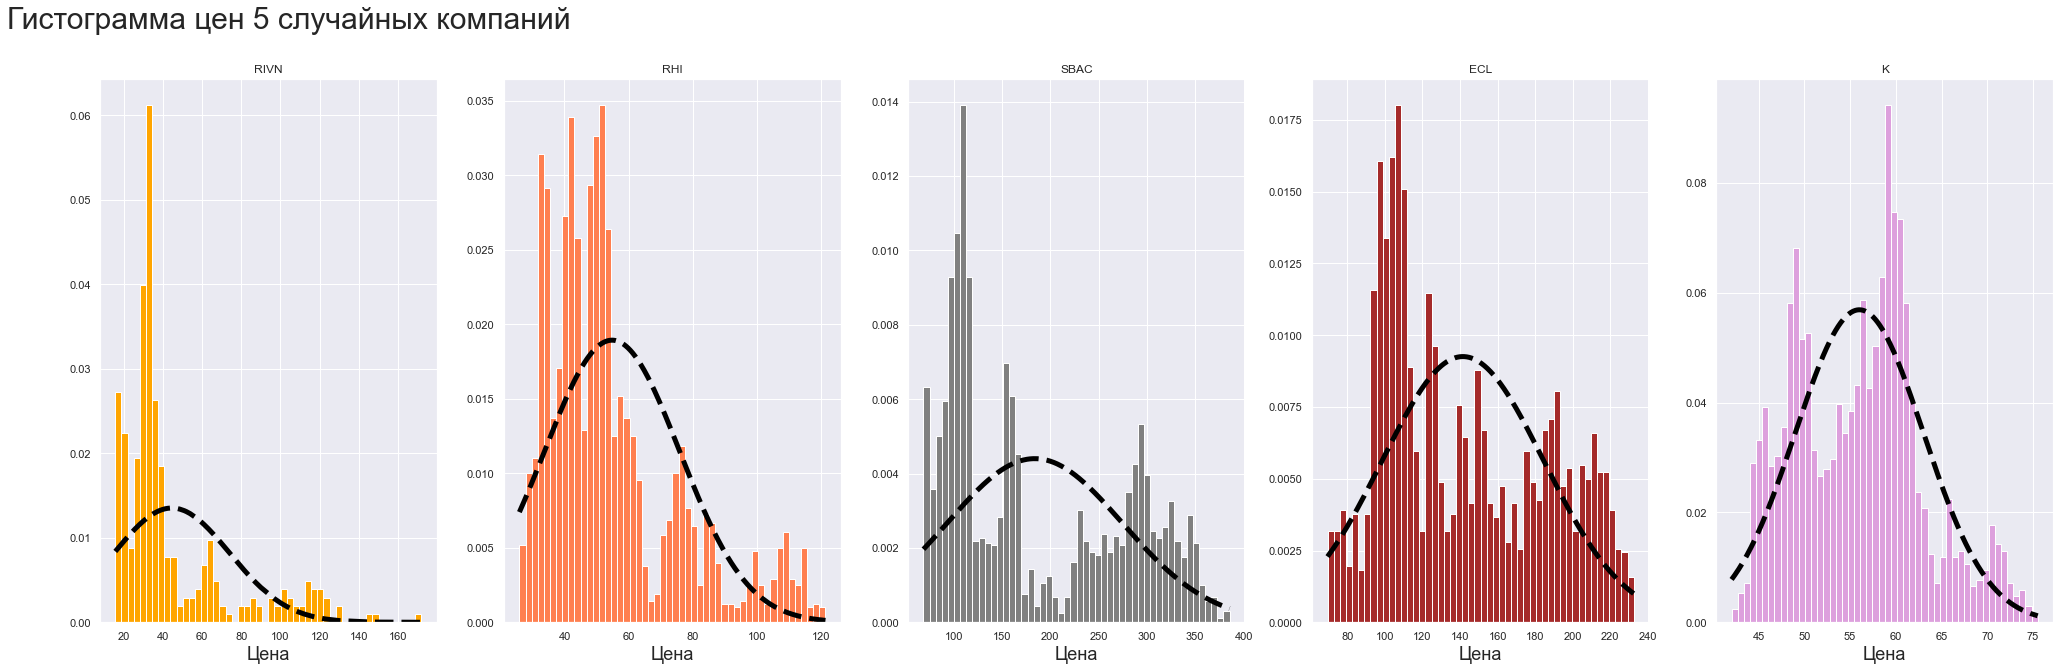

In [611]:
figure, ax = plt.subplots(1, 5, figsize=(35,10))
figure.suptitle('Гистограмма цен 5 случайных компаний', fontsize=30, x=0.2)


colors=['orange', 'coral','grey','brown','plum']

for k in range(5):
    ax[k].hist(sample[sample.columns[k]], color=colors[k], density=True, bins=50)

    x = sts.norm(loc=sample[sample.columns[k]].mean(), 
                 scale=sample[sample.columns[k]].std())
    x_pdf = x.pdf(np.unique(sample[sample.columns[k]]))
    
    ax[k].plot(np.unique(sample[sample.columns[k]]), x_pdf, '--', linewidth=5, color='black')
    ax[k].set(title = sample.columns[k])

    ax[k].set_xlabel('Цена', fontsize=18)

<h1 style='color:red'>Вывод:</h1>
<p style='font-size:18px'>• Исходя из гистограммы цен 5 случайных компаний, где нарисована гистограмма цен и график нормального распределения (черная линия) с параметрами, вычесленными для каждого тикера, можно сделать вывод, что цены акций не распределены нормально. Это можно наглядно увидеть на графике, что гистограмма цен не совпадает с графиком нормального распределения</p>
<br>
<p style='font-size:18px'>• На графике динамики цен отображены цены 5 случайно выбранных компаний. Черной прерывистой линией обозначена динамика изменения средней цены всех компаний на рынке, а также темно-серым обозначено направление изменения средней цены (тренд). На основе восходящего тренда (или роста средней цены всех акций) можно сделать вывод, что за последние 10 лет рынок в целом рос. Однако на графике можно наблюдать и кризис (падение средней цены всех акций), который произошел в 2020 (этот момент обозначен и подписан на графике)</p>
<br>

__д) [5 баллов]__ Найдите медианную цену акций за прошедший год (НЕ 10 лет) для каждого тикера. Сделайте `left join` таблицы с медианными ценами и таблицы с секторами экономики. Найдите для каждого сектора $95\%$ квантиль медианной цены.

In [612]:
sample_ly = df_prices.loc[(df_prices.index >= '2022') & (df_prices.index < '2023')].T.copy()
sample_ly['Median'] = sample_ly.median(axis=1)

left_j = df_inf[['GICS Sector', 'Symbol']].set_index('Symbol').copy()

sec_n_m = pd.merge(left_j['GICS Sector'], 
         sample_ly['Median'], 
         left_index=True, 
         right_index=True, 
         how='left').reset_index(drop=True)
sec_n_m.groupby(['GICS Sector']).quantile(.95)

Median
GICS Sector                        
Communication Services   260.027003
Consumer Discretionary  1760.140015
Consumer Staples         246.914078
Energy                   159.902217
Financials               354.431122
Health Care              523.427579
Industrials              427.725174
Information Technology   419.005197
Materials                284.315181
Real Estate              316.791876
Utilities                140.414839

## 1.2 Риск и доходность

__е) [5 баллов]__ Финансовые продукты описываются двумя характеристикам – __доходностью__ и __риском.__ Доходность – это процентное изменение стоимости за некоторый промежуток времени. Мы будем работать с доходностями за день: 

$$
R_t = \frac{P_t - P_{t-1}}{P_{t-1}}
$$

Перейдите к доходностям для всей таблицы `df_prices`. Для того, чтобы посчитать разность между каждой строкой таблицы и предыдущей строкой, используйте команду `.diff()`. Чтобы сдвинуть все строки на одну вниз, используйте команду `shift(1)`.  

Поделите результат работы команды `diff` на результат работы команды `shift`. Обратите внимание, что в первой колонке теперь все значения `NaN`, так как мы не можем посчитать доходность для самого первого дня. Удалите из таблицы эту строку. 

In [613]:
df_r = df_prices.diff().copy()
df_l = df_prices.shift(1, fill_value=0).copy()

rt = df_r/df_l
rt.iloc[:1] = 0
rt = rt.drop (index=['2013-03-05 00:00:00'])
rt

A       AAL       AAP      AAPL      ABBV  \
Date                                                                          
2013-03-06 00:00:00+00:00  0.013596  0.037010 -0.010006 -0.012710  0.006132   
2013-03-07 00:00:00+00:00  0.000231  0.017159  0.000525  0.011559 -0.006624   
2013-03-08 00:00:00+00:00 -0.005087  0.006748  0.008135  0.002648 -0.004001   
2013-03-11 00:00:00+00:00 -0.005112  0.014075  0.008980  0.014245  0.008838   
2013-03-12 00:00:00+00:00 -0.004439  0.024455 -0.002193 -0.021559 -0.013273   
...                             ...       ...       ...       ...       ...   
2023-02-27 00:00:00+00:00  0.006940  0.004499  0.012820  0.008248  0.010281   
2023-02-28 00:00:00+00:00 -0.001477  0.022393  0.030790 -0.003448 -0.002463   
2023-03-01 00:00:00+00:00 -0.031415  0.003129 -0.042357 -0.014246  0.008902   
2023-03-02 00:00:00+00:00  0.030252  0.005614  0.002809  0.004129 -0.005732   
2023-03-03 00:00:00+00:00  0.015953  0.014888 -0.005244  0.035090  0.010882   

                                ABC      ABNB       ABT      ACGL       ACN  \
Date                                                                          
2013-03-06 00:00:00+00:00  0.004350       NaN -0.011537  0.001207  0.006370   
2013-03-07 00:00:00+00:00 -0.008251       NaN  0.004669  0.013869  0.002067   
2013-03-08 00:00:00+00:00  0.008319       NaN  0.007262  0.003965  0.010056   
2013-03-11 00:00:00+00:00  0.001444       NaN  0.007208  0.003555 -0.000638   
2013-03-12 00:00:00+00:00  0.002060       NaN  0.001432 -0.000197 -0.003576   
...                             ...       ...       ...       ...       ...   
2023-02-27 00:00:00+00:00 -0.012234  0.006108 -0.006868  0.000578 -0.001051   
2023-02-28 00:00:00+00:00 -0.006831 -0.002024  0.019545  0.011415 -0.002629   
2023-03-01 00:00:00+00:00  0.006107 -0.019873 -0.008750  0.013857 -0.007381   
2023-03-02 00:00:00+00:00 -0.010287  0.012828  0.017852 -0.000986  0.006336   
2023-03-03 00:00:00+00:00  0.008070  0.027374  0.017734  0.005642  0.014853   

                           ...       XOM      XRAY       XYL       YUM  \
Date                       ...                                           
2013-03-06 00:00:00+00:00  ... -0.000558  0.006665  0.031283  0.009201   
2013-03-07 00:00:00+00:00  ... -0.009491  0.005912 -0.032038  0.005081   
2013-03-08 00:00:00+00:00  ...  0.002931  0.004701  0.001057  0.006989   
2013-03-11 00:00:00+00:00  ...  0.002136  0.002807  0.011607  0.001772   
2013-03-12 00:00:00+00:00  ...  0.000000 -0.002567 -0.007998  0.013119   
...                        ...       ...       ...       ...       ...   
2023-02-27 00:00:00+00:00  ... -0.001806  0.006408  0.001465 -0.002050   
2023-02-28 00:00:00+00:00  ... -0.005789  0.101881  0.000975  0.004661   
2023-03-01 00:00:00+00:00  ...  0.008916 -0.018650 -0.015197 -0.007550   
2023-03-02 00:00:00+00:00  ...  0.004599  0.008565  0.011475  0.019651   
2023-03-03 00:00:00+00:00  ...  0.012657  0.028132  0.016333  0.007694   

                                ZBH      ZBRA      ZION        ZM        ZS  \
Date                                                                          
2013-03-06 00:00:00+00:00 -0.007121 -0.001783  0.023673       NaN       NaN   
2013-03-07 00:00:00+00:00 -0.005313 -0.003796  0.007177       NaN       NaN   
2013-03-08 00:00:00+00:00  0.006810  0.009413  0.001584       NaN       NaN   
2013-03-11 00:00:00+00:00  0.004510  0.009547  0.013043       NaN       NaN   
2013-03-12 00:00:00+00:00  0.006073  0.001100 -0.006243       NaN       NaN   
...                             ...       ...       ...       ...       ...   
2023-02-27 00:00:00+00:00  0.004890  0.014764  0.002387 -0.002841  0.007335   
2023-02-28 00:00:00+00:00  0.004623  0.013570  0.004564  0.011801 -0.005234   
2023-03-01 00:00:00+00:00 -0.014451  0.006961 -0.003556 -0.066631 -0.020663   
2023-03-02 00:00:00+00:00  0.007454  0.012304 -0.042228  0.014507  0.044301   
2023-03-03 00:00:00+00:00  0.026262  0.011076  0.019044  0.002548 -

Постройте для 5 случайно выбранных тикеров картинку с динамикой доходностей, гистограмму доходностей и ящики с усами. Ответьте на следующие вопроcы:

- Имеют ли доходности по акциям нормальное распределение? 
- Видно ли по ящику с усами, что в данных довольно много выбросов? 

__Ответ:__ ваш текст

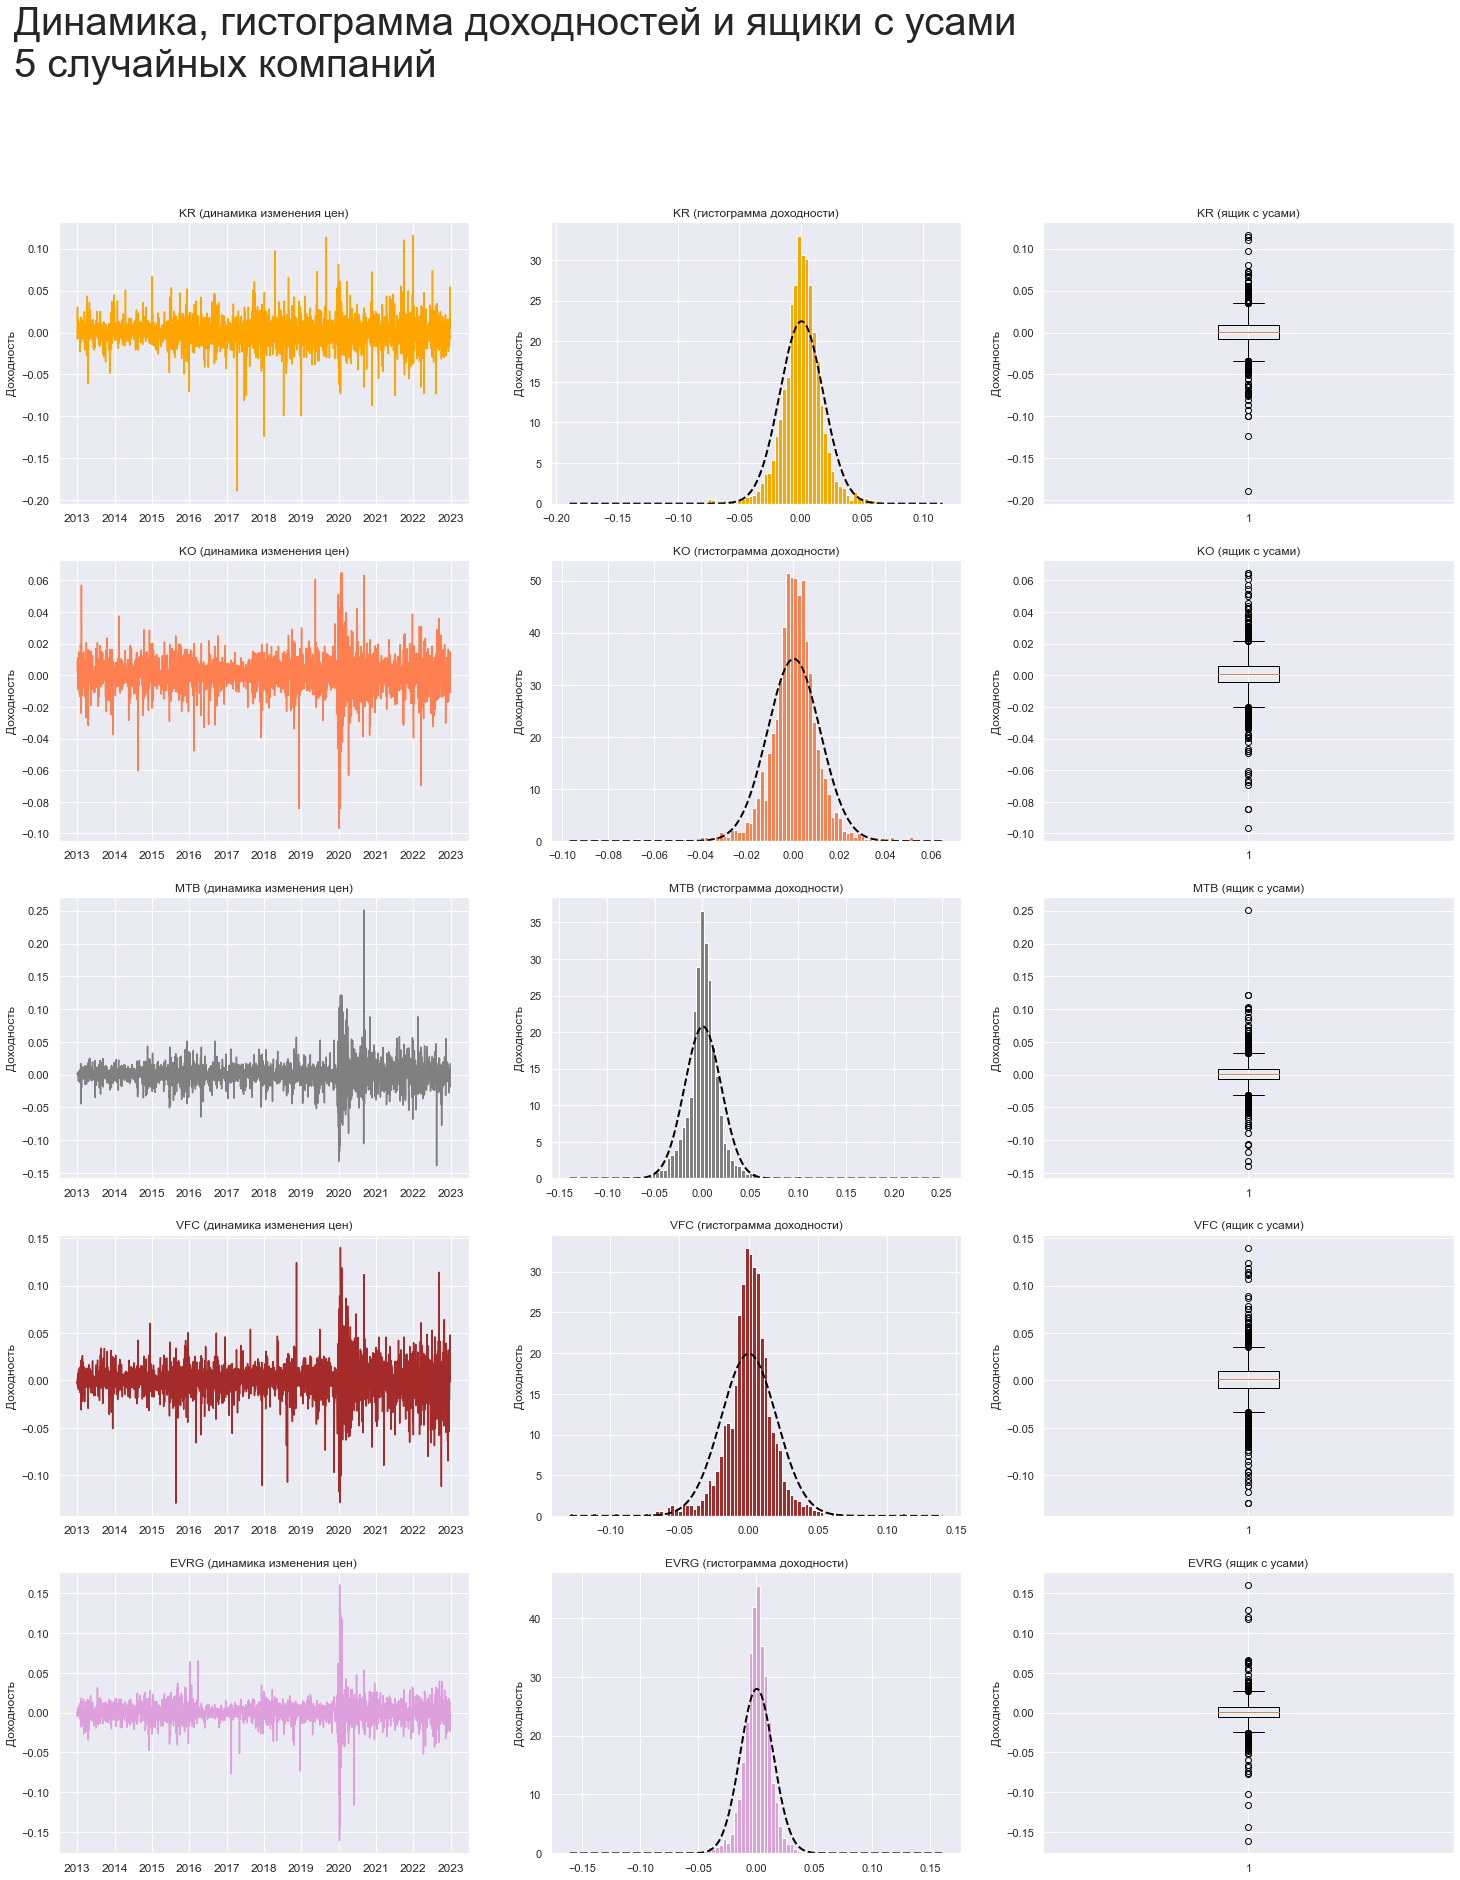

In [614]:
np.random.seed(1)

pl = rt[np.random.choice(list(rt), 5, replace=False)].reset_index(drop=True).copy()

figure, axis = plt.subplots(5, 3, figsize=(25,30))
figure.suptitle('Динамика, гистограмма доходностей и ящики с усами\n5 случайных компаний', 
                fontsize=40, x=0.1, horizontalalignment='left')


colors=['orange', 'coral','grey','brown','plum']
for i in range(5):
    axis[i][0].plot(pl[pl.columns[i]], color=colors[i])
    axis[i][0].set(title = list(pl)[i] + ' (динамика изменения цен)', ylabel='Доходность')
    axis[i][0].set_xticks(np.linspace(0,len(sample), 11), sample.index.year.unique(),fontsize=12)

    axis[i][1].hist(pl[pl.columns[i]], color=colors[i], bins=100, density=True)
    axis[i][1].set(title = list(pl)[i] + ' (гистограмма доходности)', ylabel='Доходность')
    
    x = sts.norm(loc=pl[pl.columns[i]].mean(), scale=pl[pl.columns[i]].std())
    x_pdf = x.pdf(np.unique(pl[pl.columns[i]]))
    axis[i][1].plot(np.unique(pl[pl.columns[i]]), x_pdf, '--', linewidth=2, color='black')

    axis[i][2].boxplot(pl[pl.columns[i]])
    axis[i][2].set(title = list(pl)[i] + ' (ящик с усами)', ylabel='Доходность')

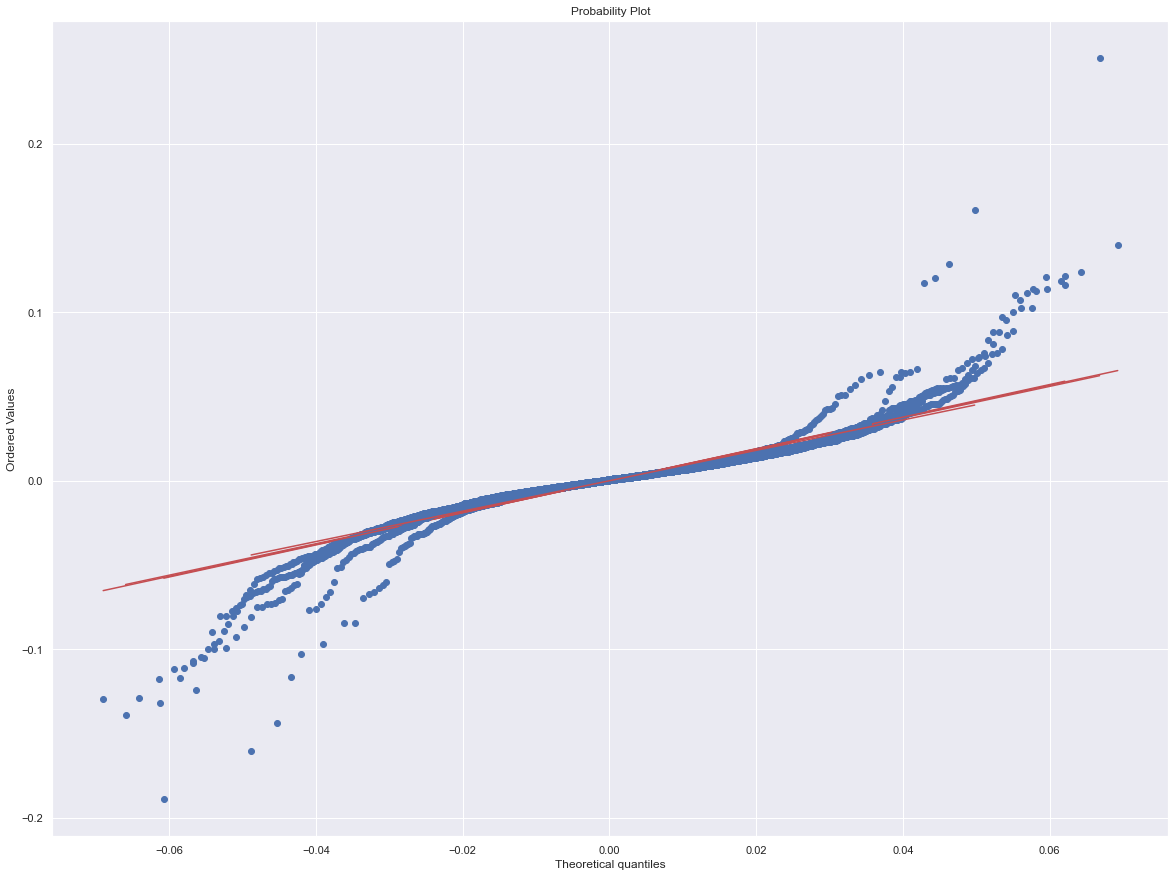

In [615]:
for i in range(5):
    sns.set(rc={'figure.figsize':(20,15)})
    ax = plt.subplot(111)
    x = pl[pl.columns[i]]
    sts.probplot(x, dist="norm", sparams=(x.mean(), x.std()), plot=ax);

<h1 style='color:red'>Вывод:</h1>
<p style='font-size:18px'>• На гистограммах показана частота доходностей и график нормального распределения. На них можно наблюдать, что гистограммы практически совпадают с нормальным распределением, следовательно, можно предположить, что доходности распределны нормально. Нашу гипотезу подтверждает диаграма квантиль-квантиль, на котором отображены 5 случайно выбранные компании, На диаграмме видно, что центры распределены нормально, а квантили на хвостах незначительно отличаются</p>
<br>
<p style='font-size:18px'>• Поскольу на ящиках с усами видно огромное количество точек, которые выше и ниже границ, можно прийти к выводу, что в данных достаточно много выбросов</p>
<br>

Чтобы посмотреть, насколько сильно распределение отличается от нормального, можно вспользоваться диаграммой квантиль-квантиль. На картинке ниже видно, что центр распределения похож на нормальное, а квантили на хвостах отличаются от нормальных в более тяжёлую сторону. 

__ё) [10 баллов]__  Без буквы `ё` никуда, скажут нам [Пафнутий Чебышёв](https://ru.wikipedia.org/wiki/%D0%A7%D0%B5%D0%B1%D1%8B%D1%88%D1%91%D0%B2,_%D0%9F%D0%B0%D1%84%D0%BD%D1%83%D1%82%D0%B8%D0%B9_%D0%9B%D1%8C%D0%B2%D0%BE%D0%B2%D0%B8%D1%87) и [Лёв Толстой](https://arzamas.academy/special/ruslit/writers/tolstoy).  

Разобьём выборку на обучающую и тестовую. Первые 4 года войдут в обучающую выборку, последний год в тестовую. Мы будем оценивать рискованность и доходность разных активов на обучающей выборке, а затем смотреть, насколько хорошо мы это сделали на тестовой.

In [616]:
df_train = rt[rt.index  < '2022-03-03']
df_test = rt[rt.index  >= '2022-03-03']

__Все расчёты ниже делайте по обучающей выборке.__ 

Посчитайте для всех компаний на обучающей выборке среднюю доходность (просто сделайте `.mean()` за весь период). Найдите 10 самых доходных компаний и 10 самых убыточных.  Есть ли среди самых доходных компаний Тесла? :) 

In [617]:
R = df_train.mean()

R_loss = pd.DataFrame(R.sort_values()[:10])
R_loss.columns = ['r']

R_profit = pd.DataFrame(R.sort_values(ascending=False)[:10])
R_profit.columns = ['r']

df1_styler = R_profit.style.set_table_attributes("style='display:inline'").set_caption('10 самых доходных компаний')
df2_styler = R_loss.style.set_table_attributes("style='display:inline'").set_caption('10 самых убыточных компаний')
space = "\xa0" * 30

display_html(df1_styler._repr_html_() + space + df2_styler._repr_html_(), raw=True)

### https://softhints.com/display-two-pandas-dataframes-side-by-side-jupyter-notebook/ ###

10 самых доходных компаний 
 
 
   
 r 
 
 
 
 
 CEG 
 0.006477 
 
 
 LCID 
 0.004682 
 
 
 MRNA 
 0.003882 
 
 
 GFS 
 0.003782 
 
 
 DDOG 
 0.003149 
 
 
 CARR 
 0.003140 
 
 
 ENPH 
 0.002918 
 
 
 ZS 
 0.002762 
 
 
 TSLA 
 0.002746 
 
 
 CRWD 
 0.002606 
 
 
 
                              
 
 10 самых убыточных компаний 
 
 
   
 r 
 
 
 
 
 RIVN 
 -0.005722 
 
 
 VTRS 
 -0.000168 
 
 
 KHC 
 -0.000037 
 
 
 GE 
 0.000021 
 
 
 IBM 
 0.000060 
 
 
 LUMN 
 0.000060 
 
 
 KMI 
 0.000071 
 
 
 SLB 
 0.000087 
 
 
 BEN 
 0.000105 
 
 
 WBD 
 0.000149

<h1 style='color:red'>Вывод:</h1>
<p style='font-size:18px'>В таблице "10 самых доходных компаний" на 9-м месте находится тикер TSLA (Tesla), следовательно, да, Тесла входит в топ 10 самых доходных компаний </p>
<br>

Один из способов измерить, насколько ценная бумага рискованная -  использовать стандартное отклонение. Посчитайте для всех компаний стандартное отклонение доходности. Найдите 10 самых рискованных компаний и 10 самых безрисковых.  Есть ли среди самых рискованных компаний Тесла? :) 

In [618]:
STD = df_train.std()
R_nonrisk = pd.DataFrame(STD.sort_values()[:10])
R_nonrisk.columns = ['std']

R_risk = pd.DataFrame(STD.sort_values(ascending=False)[:10])
R_risk.columns = ['std']

df1_styler = R_risk.style.set_table_attributes("style='display:inline'").set_caption('10 самых рискованных компаний')
df2_styler = R_nonrisk.style.set_table_attributes("style='display:inline'").set_caption('10 самых безрисковых компаний')

display_html(df1_styler._repr_html_() + space + df2_styler._repr_html_(), raw=True)


10 самых рискованных компаний 
 
 
   
 std 
 
 
 
 
 RIVN 
 0.072406 
 
 
 LCID 
 0.066841 
 
 
 ENPH 
 0.052601 
 
 
 MRNA 
 0.052030 
 
 
 PDD 
 0.045639 
 
 
 ZM 
 0.042788 
 
 
 GFS 
 0.041315 
 
 
 SEDG 
 0.040310 
 
 
 CRWD 
 0.039878 
 
 
 DDOG 
 0.039034 
 
 
 
                              
 
 10 самых безрисковых компаний 
 
 
   
 std 
 
 
 
 
 VZ 
 0.011099 
 
 
 JNJ 
 0.011255 
 
 
 KO 
 0.011309 
 
 
 PG 
 0.011339 
 
 
 RSG 
 0.011408 
 
 
 WM 
 0.011432 
 
 
 PEP 
 0.011443 
 
 
 CL 
 0.011778 
 
 
 MMC 
 0.012117 
 
 
 COST 
 0.012303

<h1 style='color:red'>Вывод:</h1>
<p style='font-size:18px'>Тикера TSLA нет ни в одной таблице, следовательно, компания Тесла является ни рискованной, ни безрискованной </p>
<br>

Обычно инвесторы принимают решение покупать бумагу к себе в портфель, отталкиваясь от того какие соотношения доходность/риск существуют на рынке. Создайте таблицу `df_result`. Запищите туда три колонки: тикер, доходность и стандартное отклонение.

In [619]:
df_result = pd.merge(STD.to_frame(), R.to_frame(), left_index=True, right_index=True)
df_result.columns = ['std', 'r']
df_result.head()

std         r
A     0.015556  0.000808
AAL   0.031476  0.000579
AAP   0.020050  0.000659
AAPL  0.017579  0.001268
ABBV  0.017331  0.000925

Постройте для наших ценных бумаг диаграмму рассеивания, на которой будет видно, где по своей доходности и риску находится какая ценная бумага.

Отдельно отметьте на картинке точку, соотвествующую Тесле так, чтобы её было видно. Можно ли купить какую-то другую бумагу, которая обладает примерно такой же доходностью как тесла, но при этом её риск меньше? 

__Ответ:__ ваш текст

In [620]:
import plotly
import plotly.express as px


fig = px.scatter(df_result, x="r", y="std", text=list(df_result.index.values.tolist()), title="Соотношение риска и доходности по компаниям")

fig.update_traces(textposition='top center')

fig.update_layout(height=800)
fig.add_annotation(
        x=df_result.loc['TSLA']['r'],
        y=df_result.loc['TSLA']['std'],
        xref="x",
        yref="y",
        text="TSLA",
        showarrow=True,
        align="center",
        arrowhead=2,
        arrowsize=1,
        arrowwidth=2,
        arrowcolor="#636363",
        ax=20,
        ay=-30,
        bordercolor="#c7c7c7",
        borderwidth=2,
        borderpad=4,
        bgcolor="#ff7f0e",
        opacity=0.8
        )
fig.show()

### https://plotly.com/python/text-and-annotations/ ###


In [621]:
tsla = df_result.loc['TSLA']

better_than_tesla = df_result[
    (df_result['std'] <= tsla['std']) & 
    (df_result['r'] >= tsla['r'])]


fig = px.scatter(better_than_tesla, x="r", y="std", 
                 text=list(better_than_tesla.index.values.tolist()), 
                 title="Соотношение риска и доходности по компаниям, которые выгоднее и менее рискованнее Теслы")

fig.update_traces(textposition='top center')

fig.update_layout(height=800)
fig.add_annotation(
        x=tsla['r'],
        y=tsla['std'],
        xref="x",
        yref="y",
        text="TSLA",
        showarrow=True,
        align="center",
        arrowhead=2,
        arrowsize=1,
        arrowwidth=2,
        arrowcolor="#636363",
        ax=20,
        ay=-30,
        bordercolor="#c7c7c7",
        borderwidth=2,
        borderpad=4,
        bgcolor="#ff7f0e",
        opacity=0.8
        )
fig.show()


<h1 style='color:red'>Вывод:</h1>
<p style='font-size:18px'>На графике "Соотношение риска и доходности по компаниям, которые выгоднее и менее рискованнее Теслы" видно, что компания CARR обладает меньшим значением std и большим значением r</p>
<br>

Чем больше риск, тем выше потенциально может оказаться доходноcть. __Но при этом мы с более высокой вероятностью можем уйти в убыток.__ 

__ж) [5 баллов]__  Надо понимать, что стандартное отклонение чувствительно к выбросам. Поэтому в качестве меры риска часто рассматривают $\text{VaR}$. 

__Value-at-Risk__ — одна из самых распространенных форм измерения финансовых рисков. Общепринято обозначается $\text{VaR}$. Еще его часто называют статистика $16:15$, такое название он получил потому, что $16:15$ – это время, в которое он якобы должен лежать на столе главы правления банка JPMorgan. (В этом банке данный показатель был впервые введен с целью повышения эффективности работы с рисками).

__Value-at-Risk__ на каком-либо уровне (скажем, $5\%$) – это просто квантиль уровня $5\%$. То есть это такая доходность, что в $95\%$ случаев у нас дела будут лучше.

Посчитайте $5\%$ $\text{VaR}$ по всем ценным бумагам. Для этого используйте метод `quantile()`. Найдите 10 самых рискованных компаний и 10 наименее рискованных компаний с точки зрения этого показателя. Запишите `VaR` в табличку `df_result` отдельной колонкой (нужно сделать `join`). Домножьте значения VaR на -1, чтобы интерпретировать числа как потери.  

In [622]:
VaR = df_train.T.quantile(.05, axis=1).copy()*(-1)
VaR

A       0.025164
AAL     0.044087
AAP     0.026499
AAPL    0.025629
ABBV    0.024926
          ...   
ZBRA    0.030612
ZION    0.030714
ZM      0.061953
ZS      0.055926
ZTS     0.022609
Name: 0.05, Length: 520, dtype: float64

In [623]:
# добавим получившиеся значения в нашу таблицу
VaR.name = 'VaR'
df_result = df_result.join(VaR)
df_result.head()

std         r       VaR
A     0.015556  0.000808  0.025164
AAL   0.031476  0.000579  0.044087
AAP   0.020050  0.000659  0.026499
AAPL  0.017579  0.001268  0.025629
ABBV  0.017331  0.000925  0.024926

In [624]:
VaR_risk = pd.DataFrame(VaR.sort_values(ascending=False)[:10])

VaR_nonrisk = pd.DataFrame(VaR.sort_values(ascending=True)[:10])


df1_styler = VaR_risk.style.set_table_attributes("style='display:inline'").set_caption('10 самых рискованных компаний по VaR')
df2_styler = VaR_nonrisk.style.set_table_attributes("style='display:inline'").set_caption('10 самых безрисковых компаний по VaR')

display_html(df1_styler._repr_html_() + space + df2_styler._repr_html_(), raw=True)



10 самых рискованных компаний по VaR 
 
 
   
 VaR 
 
 
 
 
 RIVN 
 0.106831 
 
 
 LCID 
 0.075715 
 
 
 ENPH 
 0.073849 
 
 
 MRNA 
 0.072876 
 
 
 PDD 
 0.065768 
 
 
 ZM 
 0.061953 
 
 
 GFS 
 0.060479 
 
 
 CEG 
 0.058496 
 
 
 DDOG 
 0.056923 
 
 
 SEDG 
 0.055984 
 
 
 
                              
 
 10 самых безрисковых компаний по VaR 
 
 
   
 VaR 
 
 
 
 
 WM 
 0.015233 
 
 
 PG 
 0.015249 
 
 
 KO 
 0.015495 
 
 
 RSG 
 0.015696 
 
 
 MCD 
 0.015866 
 
 
 PEP 
 0.015868 
 
 
 JNJ 
 0.015890 
 
 
 SO 
 0.016385 
 
 
 VZ 
 0.016457 
 
 
 CL 
 0.016865

Постройте для наших ценных бумаг диаграмму рассеивания, на которой будет видно, где по своей доходности и риску находится какая ценная бумага. Отдельно отметьте теслу. В качестве меры риска используйте $\text{VaR}.$

In [625]:
import plotly
import plotly.express as px


fig = px.scatter(df_result, x="r", y="VaR", 
                 text=list(df_result.index.values.tolist()), 
                 title="Соотношение риска и доходности по компаниям")

fig.update_traces(textposition='top center')

fig.update_layout(height=800)
fig.add_annotation(
        x=df_result.loc['TSLA']['r'],
        y=df_result.loc['TSLA']['VaR'],
        xref="x",
        yref="y",
        text="TSLA",
        showarrow=True,
        align="center",
        arrowhead=2,
        arrowsize=1,
        arrowwidth=2,
        arrowcolor="#636363",
        ax=20,
        ay=-30,
        bordercolor="#c7c7c7",
        borderwidth=2,
        borderpad=4,
        bgcolor="#ff7f0e",
        opacity=0.8
        )
fig.show()

### https://plotly.com/python/text-and-annotations/ ###



$\text{VaR}$ хорош тем, что описывает именно ту часть распределения, которую мы боимся. Но $\text{VaR}$ - это лучшее из $5\%$ худших случаев. А что лежит в тех $5\%$ худших случаев?…

__Expected shortfall__ - это среднее значение по всем тем точкам, что оказались хуже $\text{VaR}$, То есть среднее по худшим $5\%$. Эта метрика показывает что в среднем произойдёт с нашей доходностью в этих самых плохих $5\%$ случаев. 

- Рассчитаете $\text{ES}$ для Теслы
- Предположим, что мы вложили в Теслу $1000$ долларов в один из самых неудачных дней. Сколько в среднем денег мы потеряем от этой $1000$ долларов к концу дня? 
- Посчитайте, сколько денег мы заработаем в $5\%$ лучших случаев к концу дня? 

__Важно:__ $\text{VaR}$ и $\text{ES}$ в этом пункте - отрицательные числа.

Посчитайте $\text{ES}$ по всем ценным бумагам. Домножьте получившееся значение на (-1). Запишите его отдельным столбцом в `df_result` (нужно сделать `join`)

In [626]:
ES = df_train[df_train <= -VaR].mean().copy()*(-1)
ES.name = 'ES'
ES

df_result = df_result.join(ES)


In [627]:
df_result

std         r       VaR        ES
A     0.015556  0.000808  0.025164  0.036676
AAL   0.031476  0.000579  0.044087  0.067565
AAP   0.020050  0.000659  0.026499  0.043459
AAPL  0.017579  0.001268  0.025629  0.039872
ABBV  0.017331  0.000925  0.024926  0.040371
...        ...       ...       ...       ...
ZBRA  0.023282  0.001256  0.030612  0.052334
ZION  0.020683  0.000733  0.030714  0.046021
ZM    0.042788  0.001823  0.061953  0.088902
ZS    0.037999  0.002762  0.055926  0.082118
ZTS   0.015534  0.000919  0.022609  0.034426

[520 rows x 4 columns]

<h1> Расчеты для Теслы </h1>

In [628]:
### ПУНКТ 1 ###

tsla_loss = 1000 * df_result.loc['TSLA']['ES']*(-1)


### ПУНКТ 2 ###

es_best_sit = df_train[df_train >= VaR].mean()


tsla_profit = 1000 * (1 + es_best_sit.loc[es_best_sit.index == 'TSLA'].values[0])

print(tsla_loss, tsla_profit)


-75.54044469806385 1086.4799681193927


<h1 style='color:red'>Вывод:</h1>
<p style='font-size:18px'>• При вложении 1000 долларов в один из самых неудачных дней, то убыток к концу дня окажется -75 долларов</p>
<br>
<p style='font-size:18px'>• При вложении 1000 долларов заработок в 5% лучших случаев к концу дня составит +86 долларов</p>
<br>

1. Округлите данные до 3-х знаков после запятой `df_result.round(3)`
2. Отсортируйте таблицу `df_result` по колонке `ES` по убыванию
3. Запишите получившиеся результаты в таблицу с колонками `'Ticker', 'std', 'r', 'VaR', 'ES'` в файл `var_result` Таблица должна быть без индексов. Последняя строка не должна быть пустой. Колонки друг от друга отделяются запятыми. Порядок колонок должен быть именно таким.
4. Отправьте свой файл `var_result.csv` в контест (https://contest.yandex.ru/contest/47242/problems/A) и прикрепите/укажите ниже ваш никнейм и ссылку на успешную посылку.

In [629]:
itog = df_result.copy()
itog['Ticker'] = itog.index
itog = itog[['Ticker', 'std', 'r', 'VaR', 'ES']]
itog = itog.reset_index(drop=True)
itog = itog.sort_values('ES', ascending=False)
itog = itog.round(3)

itog



itog.to_csv('var_result.csv', index=False)

<h3>Никнейм: vaparamonov_1@edu.hse.ru</h3>
<h3>Успешная посылка: 84645367</h3>

> __Дисклеймер:__ Успешная посылка в контесте является обязательным условием получения полного балла за этот (и следующий) пункт. Если добиться успешной посылки не удастся, баллы будут выставляться на усмотрение проверяюшего.

> При этом ОК в контесте не гарантирует полный балл. Оценка всё равно может быть снижена в случае обнаружения неэффективностей или ошибок в коде. Если вы сдадите в AnyTask очевидно неработающий код или ноутбук без кода, но при этом в контест будет сдан корректный файл, то это будет расцениваться как плагиат. На всякий случай просим вас сдать вместе с ноутбуком файл res_fall.csv в anytask.

__Какая метрика лучше?__

Никакая. Все рассуждения о риске – это попытки уложить функцию распределения доходностей в одно единственное число. Поэтому информация потеряется и все метрики будут не идеальны. А к чему это приведет, можно прочитать в книге Скотта Паттерсона ["Кванты. Как волшебники от математики заработали миллиарды и чуть не обрушили фондовый рынок."](https://disk.yandex.ru/i/ryFfPZ8_1uTO6g) Тем не менее, какие-то цифры, на которые можно было бы ориентироваться при принятии решений необходимы.

## 1.3 VaR-кривая 

__з) [10 баллов]__ Мы что-то насчитали. А это вообще работает? Давайте проверим на тестовой выборке для Теслы.

In [630]:
var_tsla = df_train['TSLA'].quantile(0.05)
df_tsla = df_test['TSLA'].reset_index()
df_tsla['is_bad'] = (df_test['TSLA'].values < var_tsla)
df_tsla['is_bad'].mean()

0.14285714285714285

На тестовой выборке мы пробили для Теслы VaR в 14% случаев вместо 5%. Это очень плохой результат. Наша оценка риска оказалась провальной. Можно с помощью теста Купика проверить значимость этих отличий, но мы пока что не будем это делать. Отложим эту историю до домашки про гипотезы.

Нарисуем VaR-кривую.

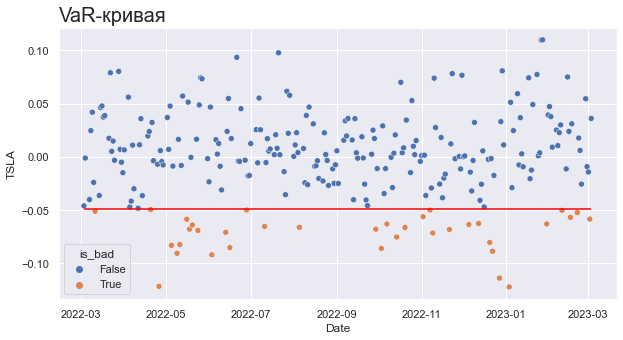

In [631]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=df_tsla, x='Date',y='TSLA', hue='is_bad')
plt.hlines(var_tsla, df_tsla.Date.min(), df_tsla.Date.max(), color='red')

plt.title('VaR-кривая', fontsize=20, loc='left');

А почему все это плохо? А потому, что мы не расширяем обучающую выборку, то есть не учитываем новую информацию. Мы один раз предсказали $\text{VaR}$ и так с ним и сидим. Давайте сделаем по-другому.

- Выделите $N$ точек (первые 4 года), найдите по ним $\text{VaR}$ для $N+1$ дня. Потом сдвинем $N$ точек вправо и найдём $\text{VaR}$ по ним для точки $N + 2$. И так далее. Тогда $\text{VaR}$ будет в каждой точке разный. 
- Нарисуйте получившуюся для Теслы кривую на картинке.
- Посчитайте как часто мы пробивали $\text{VaR}$ на практике, улучшилась ли цифра?

In [632]:
train = rt[rt.index <= '2022-03-02 00:00:00']['TSLA'].copy()
plusing = rt[rt.index > '2022-03-02 00:00:00']['TSLA'].copy()
vars = []
for i in range(len(plusing)):
    jopa = pd.concat([train[i:], plusing[:i]], axis=0)
    vars.append(jopa.quantile(.05))


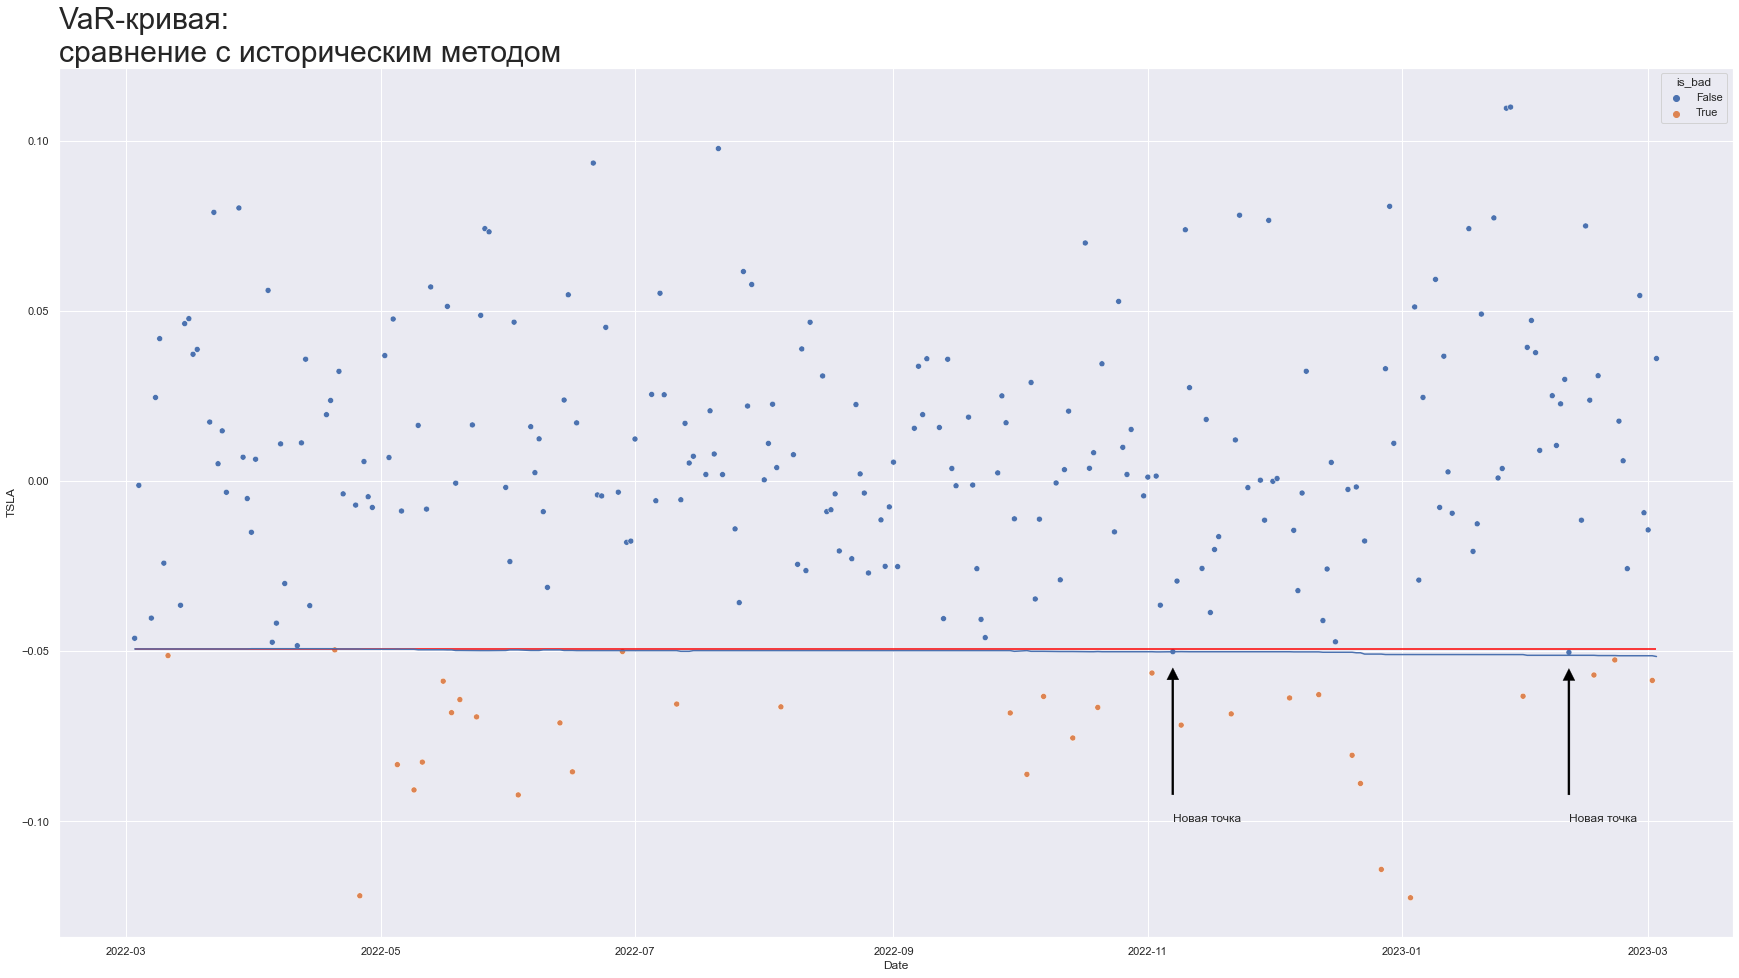

In [633]:
plt.figure(figsize=(30,16))

df_tsla['is_bad'] = (df_test['TSLA'].values < vars)
df_tsla['is_bad'].mean()

sns.scatterplot(data=df_tsla, x='Date',y='TSLA', hue='is_bad')
plt.hlines(var_tsla, df_tsla.Date.min(), df_tsla.Date.max(), color='red')
plt.plot(df_tsla['Date'], vars)

#plt.annotate('Новая точка',xy=('2022-04-20 00:00:00',-0.049555),xytext=('2022-04-20 00:00:00',-0.1),arrowprops={'linewidth':0.3, 'facecolor':"black", 'edgecolor':"black", 'shrink':0.1, 'width':2})
#plt.annotate('Новая точка',xy=('2022-06-28 00:00:00',-0.050044),xytext=('2022-06-28 00:00:00',-0.1),arrowprops={'linewidth':0.3, 'facecolor':"black", 'edgecolor':"black", 'shrink':0.1, 'width':2})
plt.annotate('Новая точка',xy=('2022-11-07 00:00:00',-0.050080),xytext=('2022-11-07 00:00:00',-0.1),arrowprops={'linewidth':0.3, 'facecolor':"black", 'edgecolor':"black", 'shrink':0.1, 'width':2})
plt.annotate('Новая точка',xy=('2023-02-10 00:00:00',-0.050309),xytext=('2023-02-10 00:00:00',-0.1),arrowprops={'linewidth':0.3, 'facecolor':"black", 'edgecolor':"black", 'shrink':0.1, 'width':2})


plt.title('VaR-кривая: \nсравнение с историческим методом', fontsize=30, loc='left');

Способ оценки $\text{VaR},$ который мы использовали, называется **историческим.** Кроме него есть довольно много других способов. Например:

- можно попробовать подогнать какое-то распределение под данные и взять его квантиль
- можно попробовать обучить модель машинного обучения предсказывать соотвествующий квантиль
- можно обучить какую-нибудь модель на временном ряде
- можно попробовать отдельно моделировать хвосты распределения

Часть способов более подробно можно [посмотреть в лекциях Ильи Езепова.](https://rpubs.com/iezepov) Они немного староваты, но хороши. 

__и) [бонусные 5 баллов]__

Разберитесь как работает какой-нибудь ещё метод оценки $\text{VaR}$ и реализуйте его. Сравните его работу с историческим методом на нескольких ценных бумагах из наших данных. Например, вы можете разобраться с [ОГРом](https://rpubs.com/iezepov/e502lec2) или [моделированием хвостов.](https://rpubs.com/iezepov/e502lec6) Весь код должен быть написан на питоне. Часть бонуса -- попытаться найти библиотеки для этого.

<h1 style='color:blue'>Библиотеки:</h1>
<p style='font-size:18px'><strong>1) Riskfolio.</strong> Можно использовать для расчета исторической оценки VaR</p>
<br>
<p style='font-size:18px'><strong>2) SciPy.</strong> Можно использовать для оценки с помощью ОГР, т.к. в нем уже заложено это распределение</p>
<br>

<h1 style='color:green'>ОГР:</h1>


<p style='font-size:18px'> Для данного пункта будем оценивать VaR с помощью обобщённого гиперболического распределения. Суть метода в том, чтобы подобрать такие параметры для распределения, чтобы оно совпадало с гистограммой доходностей Теслы и найти 5% квантиль от этого распределения. Сначала покажем на трэйновой выборке, что нормальное распределение не точно описывает распределение доходностей по сравнению с ОГР

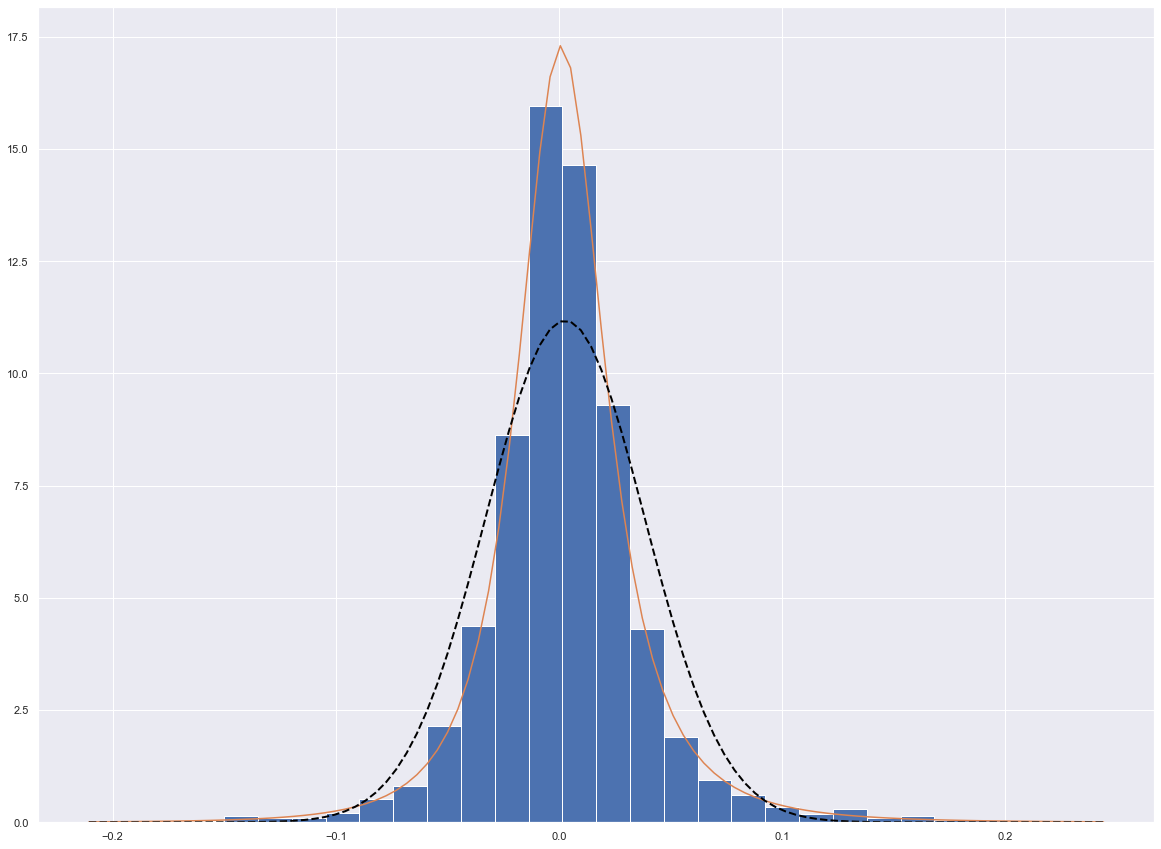

In [634]:
from scipy.stats import genhyperbolic

train = rt[rt.index <= '2022-03-03 00:00:00']['TSLA'].copy()
plusing = rt[rt.index > '2022-03-03 00:00:00']['TSLA'].copy()

x = np.linspace(train.min(), train.max(), 100)
par = genhyperbolic.fit(returns)
plt.hist(train, density=True, bins=30)
plt.plot(x, genhyperbolic.pdf(x, *par))

x_n = sts.norm(loc=train.mean(), scale=train.std())
x_pdf = x_n.pdf(x)
plt.plot(x, x_pdf, '--', linewidth=2, color='black')
plt.show()



<p style='font-size:18px'> На графике отображена гистограмма доходностей Теслы и график нормального распределения. Также на графике отображен график обобщенного гиперболического распределения с оптимальными параметрами. На графике видно, что ОГР гораздо четче описывает гистограмму доходностей. Найдем распределение для каждого временного отрезка и посчитаем квантили каждого распределения, чтобы отоброзить изменение показателя VaR, оцененного с помощью ОГР, в динамике</p>

In [635]:
from scipy.stats import genhyperbolic

vars_ogr = []
train = rt[rt.index <= '2022-03-02 00:00:00']['TSLA'].copy()
plusing = rt[rt.index > '2022-03-02 00:00:00']['TSLA'].copy()


def learning(data):
    global vars_ogr
    data = data.values
    x = np.linspace(data.min(), data.max(), 100)
    params = genhyperbolic.fit(returns)
    var = np.quantile(genhyperbolic.pdf(x, *params), 0.05)
    vars_ogr.append(var*(-1))


for i in range(len(plusing)):
    vib = pd.concat([train[i:], plusing[:i]], axis=0)
    learning(vib)


<p style='font-size:18px'> Теперь отразим все посчитанные VaR с помощью разных методов, чтобы сравнить насколько изменился результат</p>

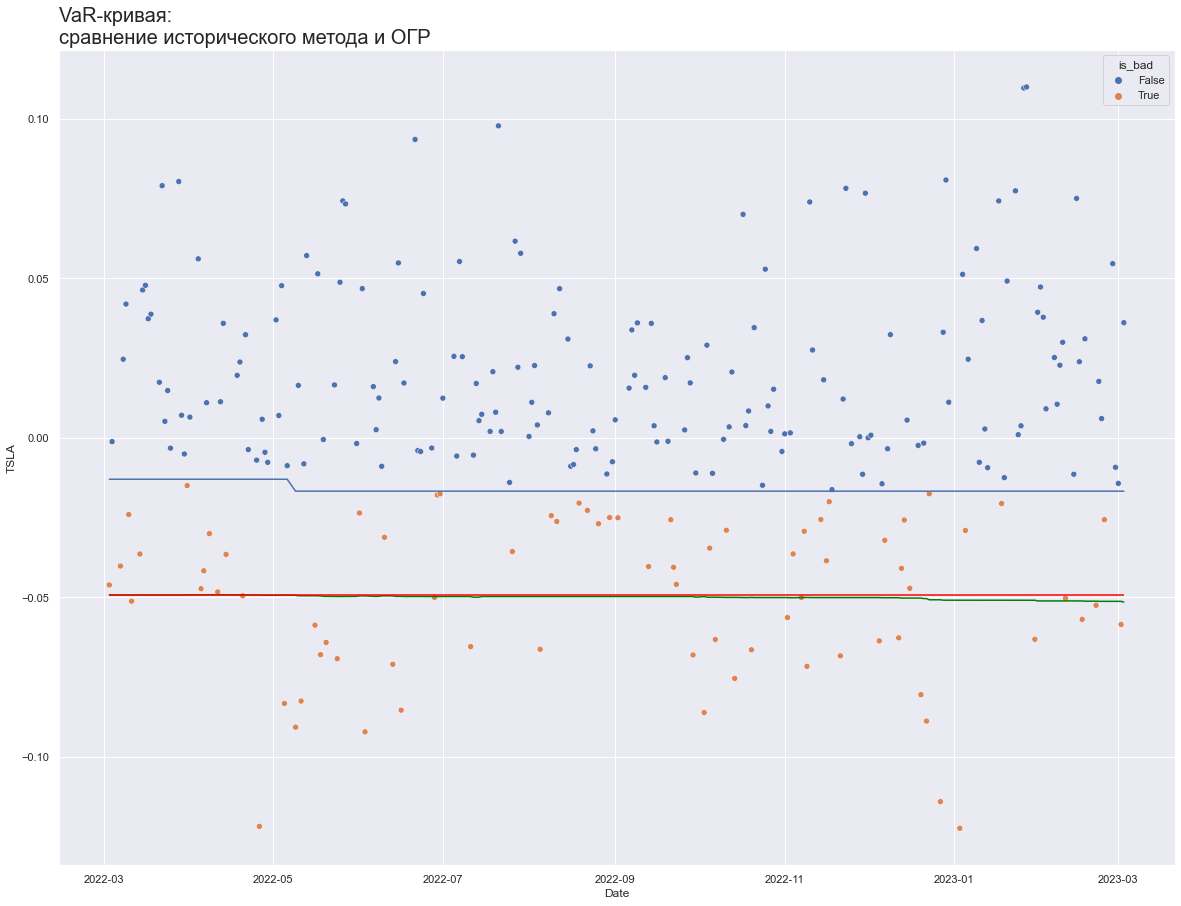

In [636]:
df_tsla['is_bad'] = (df_test['TSLA'].values < vars_ogr)
df_tsla['is_bad'].mean()

sns.scatterplot(data=df_tsla, x='Date',y='TSLA', hue='is_bad')
plt.plot(df_tsla['Date'], vars,color='green') 
plt.hlines(var_tsla, df_tsla.Date.min(), df_tsla.Date.max(), color='red')
plt.plot(df_tsla['Date'], vars_ogr)

plt.title('VaR-кривая: \nсравнение исторического метода и ОГР', fontsize=20, loc='left');

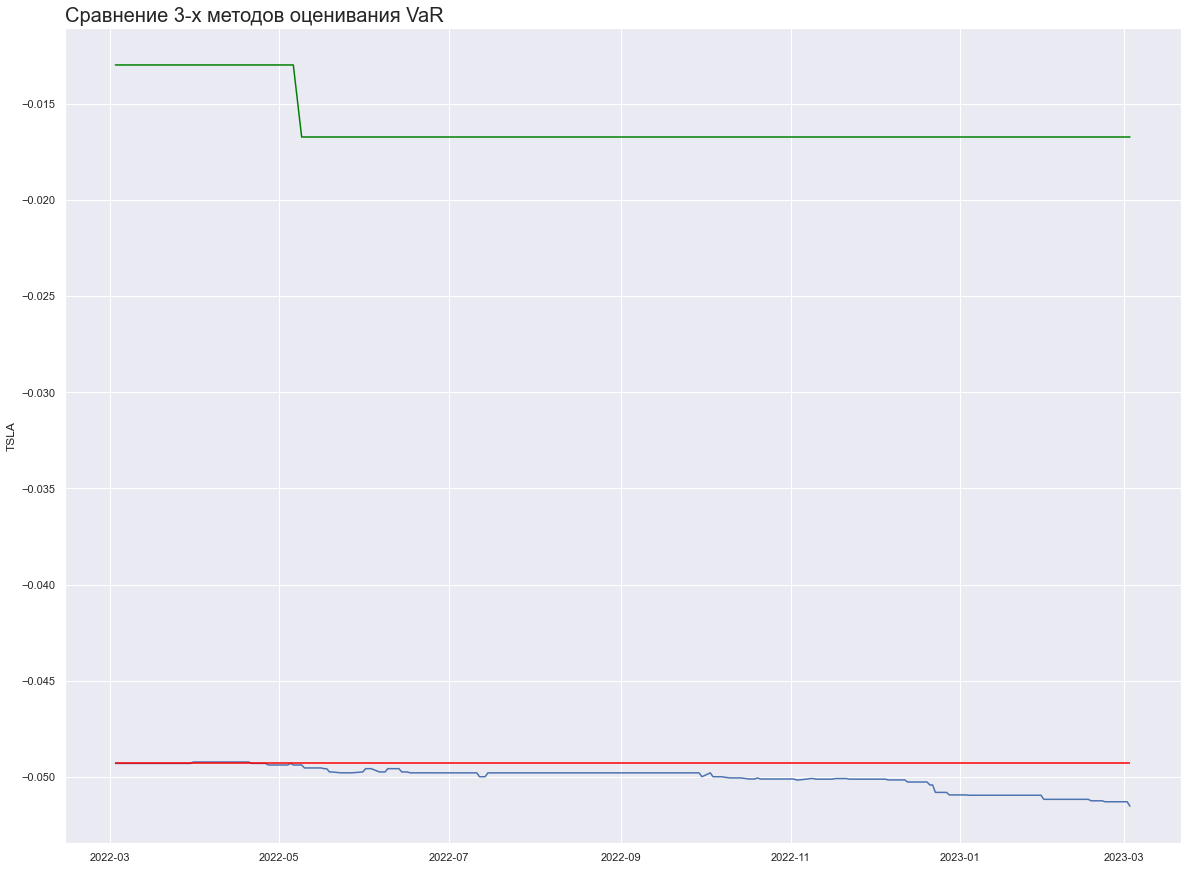

In [637]:
plt.plot(df_tsla['Date'], vars);
plt.plot(df_tsla['Date'], vars_ogr,color='green') 
plt.hlines(var_tsla, df_tsla.Date.min(), df_tsla.Date.max(), color='red')
plt.title('Сравнение 3-х методов оценивания VaR', fontsize=20, loc='left')
plt.ylabel('TSLA')
plt.show()

<h1 style='color:red'>Вывод:</h1>
<p style='font-size:18px'>При сравнении двух методов оценивания VaR можно прийти к выводу, что стало больше значений, которые находятся ниже VaR. Оценка методом ОГР лучше показывает, чем остальные оценки, что лучше в Теслу не инвестировать :)</p>

  ---------

# Часть 2: чековая

За задание можно получить $50$ баллов. Мы будем работать с покупками и чеками. Смотреть за корреляциями в покупках довольно полезно.

> В 1992 году группа по консалтингу в области ритейла компании Teradata под руководством Томаса Блишока провела исследование 1.2 миллиона транзакций в 25 магазинах для ритейлера Osco Drug (Drug Store — формат разнокалиберных магазинов у дома). После анализа всех этих транзакций самым сильным правилом получилось «Между 17:00 и 19:00 чаще всего пиво и подгузники покупают вместе». 

>К сожалению, такое правило показалось руководству Osco Drug настолько контринтуитивным, что ставить подгузники на полках рядом с пивом они не стали. Хотя объяснение паре пиво-подгузники вполне себе нашлось: когда оба члена молодой семьи возвращались с работы домой (как раз часам к 5 вечера), жены обычно отправляли мужей за подгузниками в ближайший магазин. И мужья, не долго думая, совмещали приятное с полезным — покупали подгузники по заданию жены и пиво для собственного вечернего времяпрепровождения.

Для работы будем использовать датасет о продуктовых корзинах: https://www.kaggle.com/heeraldedhia/groceries-dataset

- `id` - номер покупки (чека)
- `fielddate` - дата покупки
- `product` - что было куплено

In [638]:
df = pd.read_csv('/Users/vsevolod/Downloads/groceries.csv', sep=',')
df.columns = ['id', 'fielddate', 'product']
print(df.shape)
df.head()

(38765, 3)


id   fielddate           product
0  1808  21-07-2015    tropical fruit
1  2552  05-01-2015        whole milk
2  2300  19-09-2015         pip fruit
3  1187  12-12-2015  other vegetables
4  3037  01-02-2015        whole milk

## 2.1 Разогреваемся

__а) [10 баллов]__ Сколько всего уникальных заказов было сделано?

In [639]:
df['id'].nunique()

3898

Какие товары покупались чаще всего? Найдите топ-10 самых популярных товаров и изобразите частоту их покупок на столбиковой диаграмме. 

In [640]:
words = df['product'].value_counts()[:10]
outp = ';'.join(df['product'])
words



whole milk          2502
other vegetables    1898
rolls/buns          1716
soda                1514
yogurt              1334
root vegetables     1071
tropical fruit      1032
bottled water        933
sausage              924
citrus fruit         812
Name: product, dtype: int64

''

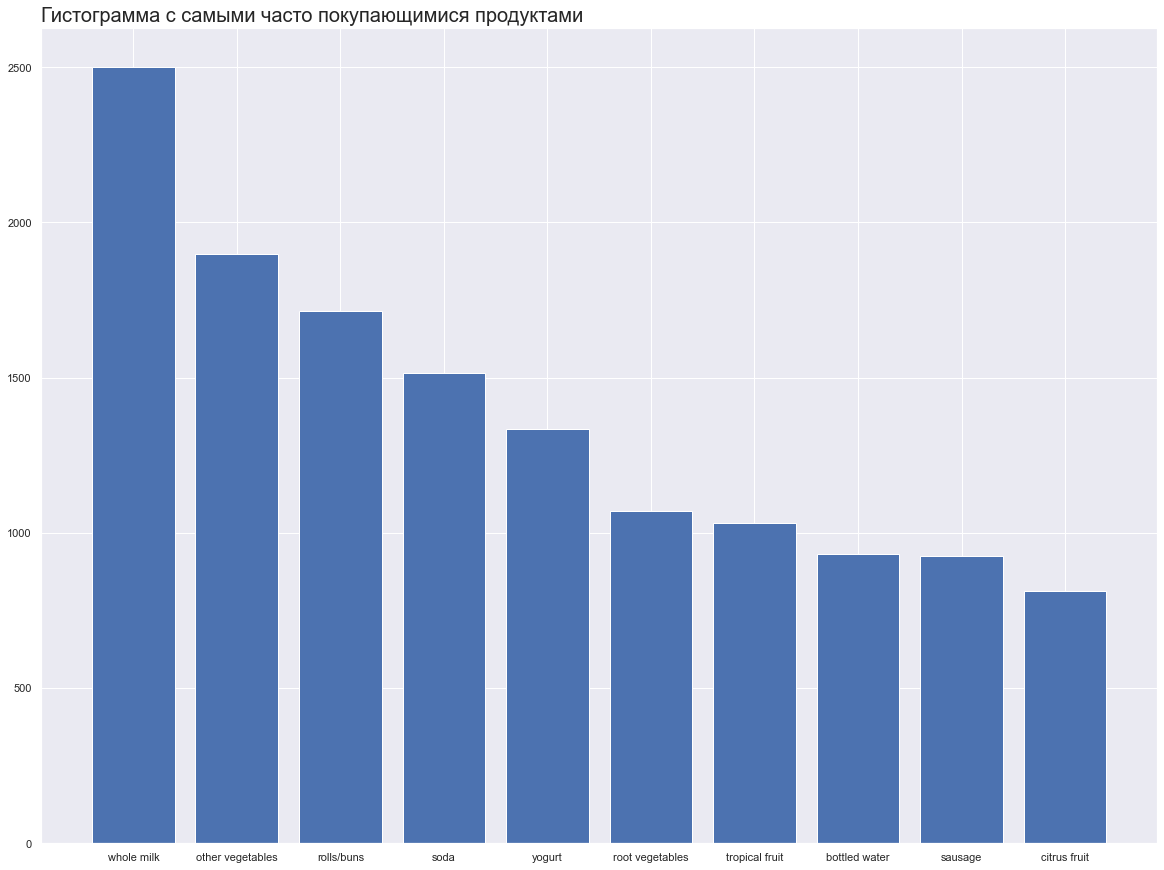

In [641]:
plt.bar(words.index, words)
plt.title('Гистограмма с самыми часто покупающимися продуктами', fontsize=20, loc='left')
;

Визуализируйте как часто покупались товары с помощью [облака слов.](https://www.python-graph-gallery.com/wordcloud/) Для графика используйте все товары из датасета. 

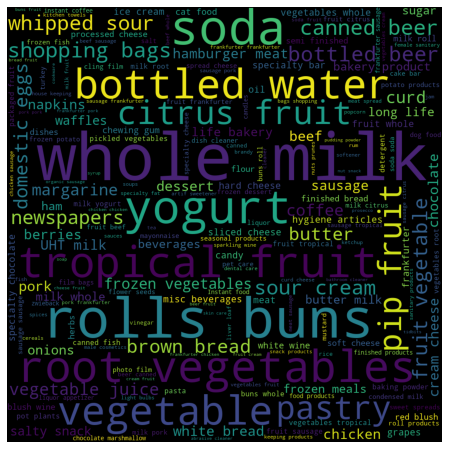

In [642]:
from wordcloud import WordCloud
wordcloud = WordCloud(height = 1000, width=1000, random_state=1).generate(outp)

plt.figure(figsize=(15,8))
plt.axis("off")

plt.imshow(wordcloud)
plt.show()


__б) [10 баллов]__ Начнём анализировать совместные покупки товаров.

В таблице выше в каждой строке записана информация о покупке конкретного товара. Давайте сделаем табличку размера "число товаров" на "число покупок", чтобы понимать какие товары покупались вместе, а какие нет. 

По строкам отложите номера чеков. По столбцам отложите название продуктов. На пересечении должно стоять число товаров, купленное в этом чеке. Используйте для этого команду `pivot_table`.

In [643]:
pivot = pd.pivot_table(df,
               index = 'id',
               columns='product',
               aggfunc='count',
               fill_value=0
               )
pivot.columns = pivot.columns.droplevel(level=0)
pivot


product  Instant food products  UHT-milk  abrasive cleaner  artif. sweetener  \
id                                                                             
1000                         0         0                 0                 0   
1001                         0         0                 0                 0   
1002                         0         0                 0                 0   
1003                         0         0                 0                 0   
1004                         0         0                 0                 0   
...                        ...       ...               ...               ...   
4996                         0         0                 0                 0   
4997                         0         0                 0                 0   
4998                         0         0                 0                 0   
4999                         0         0                 0                 0   
5000                         0         0                 0                 0   

product  baby cosmetics  bags  baking powder  bathroom cleaner  beef  berries  \
id                                                                              
1000                  0     0              0                 0     0        0   
1001                  0     0              0                 0     1        0   
1002                  0     0              0                 0     0        0   
1003                  0     0              0                 0     0        0   
1004                  0     0              0                 0     0        0   
...                 ...   ...            ...               ...   ...      ...   
4996                  0     0              0                 0     0        0   
4997                  0     0              0                 0     0        0   
4998                  0     0              0                 0     0        0   
4999                  0     0              0                 0     0        2   
5000                  0     0              0                 0     0        0   

product  ...  turkey  vinegar  waffles  whipped/sour cream  whisky  \
id       ...                                                         
1000     ...       0        0        0                   0       0   
1001     ...       0        0        0                   1       0   
1002     ...       0        0        0                   0       0   
1003     ...       0        0        0                   0       0   
1004     ...       0        0        0                   0       0   
...      ...     ...      ...      ...                 ...     ...   
4996     ...       0        0        0                   0       0   
4997     ...       0        0        0                   0       0   
4998     ...       0        0        0                   0       0   
4999     ...       0        0        0                   1       0   
5000     ...       0        0        0                   0       0   

product  white bread  white wine  whole milk  yogurt  zwieback  
id                                                              
1000               0           0           2       1         0  
1001               1           0           2       0         0  
1002               0           0           1       0         0  
1003               0           0           0       0         0  
1004               0           0           3       0         0  
...              ...         ...         ...     ...       ...  
4996               0           0           0       0         0  
4997               0           1           1       0         0  
4998               0           0           0       0         0  
4999               0           0           0       1         0  
5000               0           0           0       0         0  

[3898 rows x 167 columns]

В нашей матрице огромное число нулей. Обычно такие матрицы называют разряжеными. Мы занимаем нулями кучу свободной памяти, которую мы могли бы не занимать, если бы хранили данные [в виде разреженных матриц.](https://cmdlinetips.com/2018/03/sparse-matrices-in-python-with-scipy/) У нас данные небольшие, поэтому мы забьём на неоптимальность и продолжим работать с ними в `pandas`.

Постройте матрицу корреляций Пирсона. Визуализируйте матрицу с помошью heatmap.

''

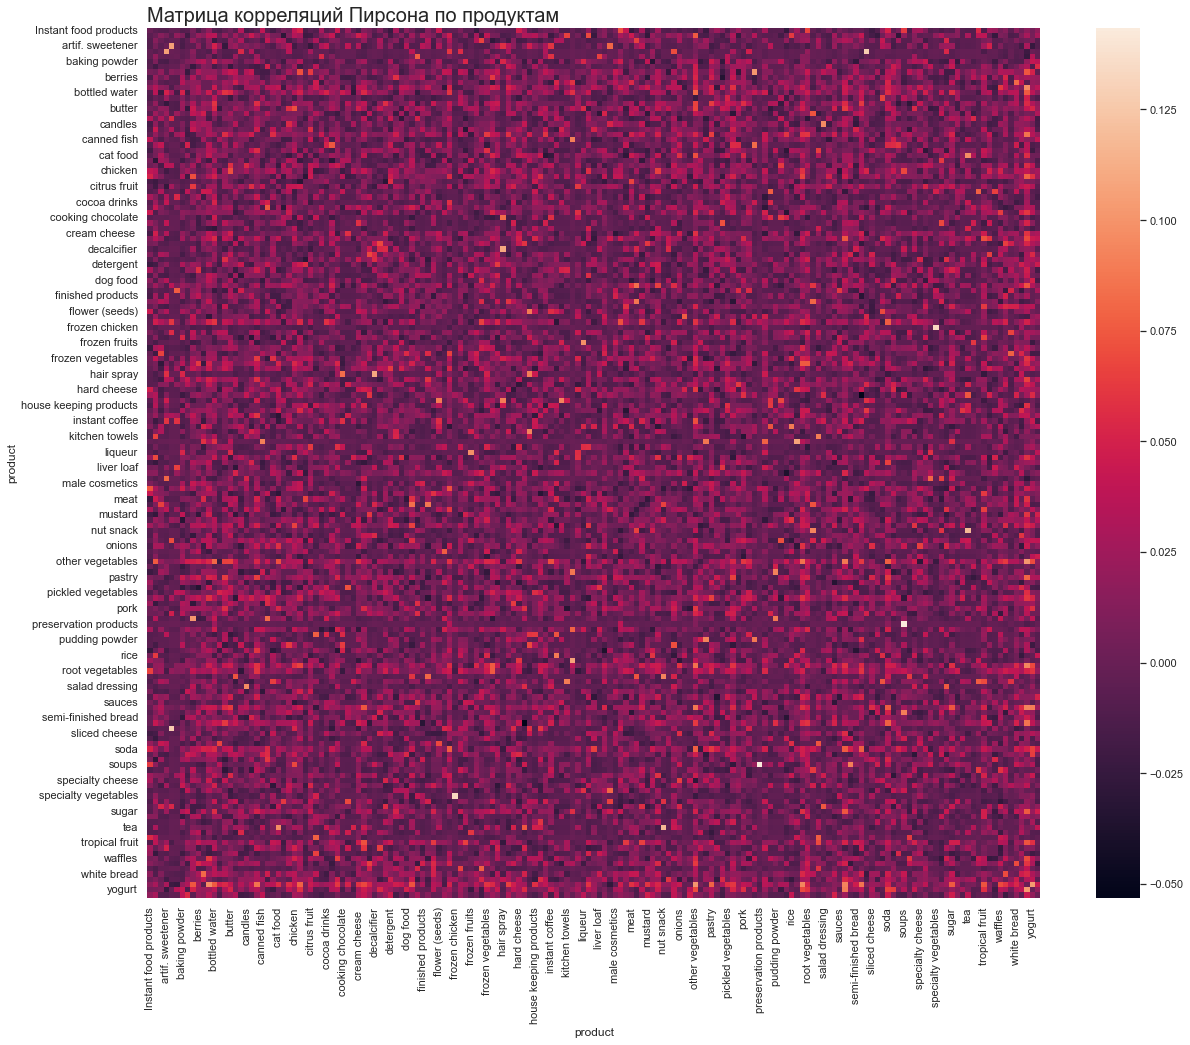

In [644]:
pivot_corr = pivot.corr(method='pearson') - np.eye(167)

sns.set(rc={'figure.figsize':(20,16)})

sns.heatmap(pivot_corr)
plt.title('Матрица корреляций Пирсона по продуктам', fontsize=20, loc='left')
;


Какие продукты сильнее всего коррелируют с яйцами, `domestic eggs` (их чаще всего покупают вместе)? Какие продукты "мешают" купить яйца, то есть отрицательно коррелируют с их покупкой? 

In [645]:
corr_with_eggs = pivot_corr['domestic eggs'].sort_values(ascending=False)[1:]
print('Продукты, которые сильнее всего коррелируют с яйцами')
corr_with_eggs[:10]

Продукты, которые сильнее всего коррелируют с яйцами


product
whole milk               0.072512
newspapers               0.064502
rubbing alcohol          0.060533
meat                     0.057861
oil                      0.055624
coffee                   0.049023
fruit/vegetable juice    0.048757
white wine               0.044977
specialty bar            0.044141
soda                     0.043606
Name: domestic eggs, dtype: float64

In [646]:
less_corr_with_eggs = pivot_corr['domestic eggs'].sort_values(ascending=True)
print('Продукты, которые отрицательно коррелируют с яйцами')
less_corr_with_eggs[:10]

Продукты, которые отрицательно коррелируют с яйцами


product
pet care               -0.024206
cooking chocolate      -0.023280
ready soups            -0.023280
dessert                -0.021004
cream                  -0.020814
soft cheese            -0.020077
specialty vegetables   -0.019925
frozen fruits          -0.019925
ketchup                -0.019409
organic products       -0.018996
Name: domestic eggs, dtype: float64

Какие два продукта коррелируют сильнее всего? 

In [647]:
pivot_corr.values[pivot_corr.values >=1] = 0
rezz= pivot_corr.max().sort_values(ascending=False)[:2]
print(f'{rezz.index[0]} и {rezz.index[1]} коррелируют сильнее всего, корреляция составила {rezz.values[0]}')

preservation products и soups коррелируют сильнее всего, корреляция составила 0.14346453108371238


__Вопрос:__ почему корреляция пирсона это плохой способ измерить взаимосвязть между покупками?

__Ответ:__


<h1 style='color:red'>Ответ:</h1>
<p style='font-size:18px'>Если необходимо измерить взаимосвязь между покупками, нужно учитывать сезон, в который совершаются покупки. В разные времена года набор покупок может значительно отличаться, что может повлиять на значение корреляции</p>

## 2.2 Коэффициент корреляции Мэтьюса

__Коэффициент корреляции Мэтьюса__ — это мера силы взаимосвязи между двумя бинарными переменными. Для того чтобы его вычислить, необходимо использовать таблицу сопряженности

|        |  $0$   |  $1$   |
|:------:|:------:|:------:|
| $0$    |  $a$   |  $b$   |
| $1$    |  $c$   |  $d$   |

В строках таблицы сопряжённости находятся значения одного признака, по столбцам — второго, в каждой ячейке — количество объектов, на которых реализовалась эта пара. Коэффициент корреляции Мэтьюса вычисляется по данным из таблицы сопряжённости следующим образом:

$$
MCC(X_1, X_2) = \frac{a \cdot d - b \cdot c}{\sqrt{(a + b) \cdot (a + c) \cdot (b + d) \cdot (c + d)}}
$$

Точно так же, как и коэффициенты Пирсона и Спирмена, корреляция Мэтьюса лежит в диапазоне от $−1$ до $1.$ Нулевое значение соответсвуте отсутствию взаимосвязи между переменными. Значение $MCC(X_1, X_2) = 1$ соотвествует случаю, когда $X_1$ и $X_2$ полностью совпадают, то есть $b = c = 0$. Значение  $MCC(X_1, X_2) = -1$ соответствует случаю, когда каждое значение $X_1$ отличается от каждого значения $X_2$. 

Для категориальных переменных можно также считать коэффициент V-Крамера. Подробнее можно почитать про разные корреляции [в этом конспекте.](https://disk.yandex.ru/i/Znahvyg3mIrW9A)

__в) [10 баллов]__ 

1. Оставьте в таблице сопряжённости два значения. Нулевое, если товара не был в чеке и единичное, если был
2. Отфильтруйте из рассмотрения товары, которые встречались меньше, чем в 10 чеках (оставить то, что `>= 10`)
3. Посчитайте для каждой пары коэффициент корреляции Мэтьюса. Чтобы удобнее было перебрать все сочетания, используйте `combinations` из модуля `itertools`.
4. Запишите получившиеся результаты в таблицу с колонками `product_1, product_2, matthews_corrcoef`. 
5. Отсортируйте получившиеся пары по коэффициенту Мэтьюса от 1 к -1 и сохраните первые сто строк получившейся таблички в файл `result_matthews.csv` Таблица должна быть без индексов. Последняя строка не должна быть пустой. Колонки друг от друга отделяются запятыми.

In [648]:
from sklearn.metrics import matthews_corrcoef

pivot_mathhews = pivot.copy()

### 1 ###

pivot_mathhews[pivot_mathhews >= 1] = 1

### 2 ###

filter = pivot_mathhews.loc[:, (pivot_mathhews.sum() >= 10)]

### 3 ###

comb = list(itertools.combinations(filter.columns, 2))

### 4 ###

result_matthews = pd.DataFrame(columns=['product_1', 'product_2', 'matthews_corrcoef'])
for i in range(len(comb)):
    mathews = matthews_corrcoef(filter[comb[i][0]], filter[comb[i][1]])
    result_matthews = pd.concat([pd.DataFrame([[comb[i][0], comb[i][1], mathews]], columns=result_matthews.columns), result_matthews], ignore_index=True)

result_matthews_output = result_matthews.sort_values('matthews_corrcoef', ascending=False)[:100].copy()

#result_matthews_output


#result_matthews_output.to_csv('result_matthews.csv', index=False)

### https://stackoverflow.com/questions/24284342/insert-a-row-to-pandas-dataframe ###

In [649]:
result_matthews_output

product_1         product_2  matthews_corrcoef
2091       nut snack               tea           0.117578
5238  flower (seeds)             honey           0.095058
562          sausage            yogurt           0.094040
3822           honey           ketchup           0.093365
2         whole milk            yogurt           0.093302
...              ...               ...                ...
9084     canned beer   root vegetables           0.059814
1338       pip fruit             syrup           0.059790
9859          butter       chewing gum           0.059775
8003       chocolate        whole milk           0.059713
9789          butter  other vegetables           0.059471

[100 rows x 3 columns]

<h3>Никнейм: vaparamonov_1@edu.hse.ru</h3>
<h3>Успешная посылка: 84693394</h3>

Отправьте свой файл `result_mat.csv` в контест (https://contest.yandex.ru/contest/47242/problems/B/) и прикрепите/укажите ниже ваш никнейм и ссылку на успешную посылку.

> __Дисклеймер:__ Успешная посылка в контесте является обязательным условием получения полного балла за этот (и следующий) пункт. Если добиться успешной посылки не удастся, баллы будут выставляться на усмотрение проверяюшего.

> При этом ОК в контесте не гарантирует полный балл. Оценка всё равно может быть снижена в случае обнаружения неэффективностей или ошибок в коде. Если вы сдадите в AnyTask очевидно неработающий код или ноутбук без кода, но при этом в контест будет сдан корректный файл, то это будет расцениваться как плагиат. На всякий случай просим вас сдать вместе с ноутбуком файл res_fall.csv в anytask.

## 2.3 Независимость событий

 Конечно же, корреляция — это [не единственный способ искать](https://habr.com/ru/company/ods/blog/353502/) между покупками ассоциативные правила. Давайе попробуем другой подход.

Мы знаем, что события $A$ и $B$ называются независимыми, если $P(AB) = P(A)\cdot P(B)$. Отталкиваясь от этого определения, можно ввести другую характеристику, которая показывает, насколько продукты зависят друг от друга, а именно __поддержку (lift).__ 

$$
lift = \frac{P(AB)}{P(A)\cdot P(B)}
$$

Эта метрика описывает отношение зависимости товаров к их независимости. Если оказалось, что `lift = 1`, это означает, что покупка товара $A$ не зависит от покупки товара $B$. Если `lift > 1`, то это означает, что вероятность встретить оба товара в чеке, $P(AB)$ высокая, то есть товары покупают вместе. Если `lift < 1`, это означает, что товары, наоборот, очень часто покупают по-отдельности. 

__г) [5 баллов]__ Посчитайте значение нашей метрики для яиц и молока (`'whole milk', 'domestic eggs'`).

> Вам аккуратно нужно сделать три среза по условию  `>= 1`. Там, где пара надо делать срез так, чтобы оба товара дали `True`. Сделать это в одну строку вам поможет метод `.all(axis=1)`. Частоты можно получить методом `.mean()`, так как python думает, что `False` - это ноль, а `True` - это единица.

In [650]:
p_a = filter['whole milk'].mean()
p_b = filter['domestic eggs'].mean()

vib = filter[['whole milk', 'domestic eggs']]>=1
p_ab = vib.all(axis=1).mean()

lift = p_ab/(p_a * p_b)


lift


1.152241691425711

__д) [10 баллов]__ 

1. Оставьте в таблице сопряжённости два значения. Нулевое, если товара не был в чеке и единичное, если был
2. Отфильтруйте из рассмотрения товары, которые встречались меньше, чем в 10 чеках (оставить то, что `>= 10`)
3. Посчитайте для каждой пары значение поддержки, `lift`. Чтобы удобнее было перебрать все сочетания, используйте `combinations` из модуля `itertools`.
4. Запишите получившиеся результаты в таблицу с колонками `product_1, product_2, lift`. 
5. Отсортируйте получившиеся пары по значению lift от больших к меньшим и сохраните первые сто строк получившейся таблички в файл `result_lift.csv` Таблица должна быть без индексов. Последняя строка не должна быть пустой. Колонки друг от друга отделяются запятыми.

In [651]:
result_lift = pd.DataFrame(columns=['product_1', 'product_2', 'lift'])


for k in range(len(comb)):

    p_12 = filter[[comb[k][0], comb[k][1]]]>=1
    p_12 = p_12.all(axis=1).mean()

    p_1 = filter[comb[k][0]].mean()

    p_2 = filter[comb[k][1]].mean()
    lifting = p_12/(p_1 * p_2)
    result_lift = pd.concat([pd.DataFrame([[comb[k][0], comb[k][1], lifting]], columns=result_lift.columns), result_lift], ignore_index=True)

result_lift_outp = result_lift.sort_values('lift', ascending=False)[:100].copy()

result_lift_outp
result_lift_outp.to_csv('result_lift.csv', index=False)

    


<h3>Никнейм: vaparamonov_1@edu.hse.ru</h3>
<h3>Успешная посылка: 84747578</h3>

Отправьте свой файл `result_lift.csv` в контест (https://contest.yandex.ru/contest/47242/problems/C/) и прикрепите/укажите ниже ваш никнейм и ссылку на успешную посылку.

> __Дисклеймер:__ Успешная посылка в контесте является обязательным условием получения полного балла за этот (и следующий) пункт. Если добиться успешной посылки не удастся, баллы будут выставляться на усмотрение проверяюшего.

> При этом ОК в контесте не гарантирует полный балл. Оценка всё равно может быть снижена в случае обнаружения неэффективностей или ошибок в коде. Если вы сдадите в AnyTask очевидно неработающий код или ноутбук без кода, но при этом в контест будет сдан корректный файл, то это будет расцениваться как плагиат. На всякий случай просим вас сдать вместе с ноутбуком файл res_fall.csv в anytask.

__е) [5 баллов]__ Давайте проинтепретируем результаты.

- Посмотрите на 10 пар продуктов с самой высокой корреляцией Мэтьюса и на 10 пар с самой низкой. Проинтерпретируйте, насколько эта корреляция логична? Придумайте ситуации, когда какие-то из пар могли бы покупаться вместе.
- Посмотрите на 10 пар продкутов с самым высоким lift, насколько логично они выделились? 
- Насколько большим оказалось пересечение двух методов? Как думаете, почему? А если взять первые сто пар?

__Ответы:__  ваш текст

In [652]:
print('10 пар продуктов с самой высокой корреляцией Мэтьюса')
result_matthews.sort_values('matthews_corrcoef',ascending=False)[:10]

10 пар продуктов с самой высокой корреляцией Мэтьюса


product_1        product_2  matthews_corrcoef
2091       nut snack              tea           0.117578
5238  flower (seeds)            honey           0.095058
562          sausage           yogurt           0.094040
3822           honey          ketchup           0.093365
2         whole milk           yogurt           0.093302
3198  kitchen towels              rum           0.089588
3363             jam             rice           0.088470
8826    canned fruit  potato products           0.088020
8526        cat food              tea           0.087834
5426            fish     meat spreads           0.086703

In [653]:
print('10 пар продуктов с самой низкой корреляцией Мэтьюса')
result_matthews.sort_values('matthews_corrcoef',ascending=False)[-10:].sort_values('matthews_corrcoef',ascending=True)

10 пар продуктов с самой низкой корреляцией Мэтьюса


product_1            product_2  matthews_corrcoef
3859                      herbs        shopping bags          -0.052079
2818   long life bakery product       red/blush wine          -0.037910
10639                   berries           photo/film          -0.034996
3210             kitchen towels                 pork          -0.034400
1521                   pet care          salty snack          -0.033813
2553                       meat              mustard          -0.033340
3642           hygiene articles           mayonnaise          -0.032691
935              red/blush wine  semi-finished bread          -0.032391
3055                     liquor            pip fruit          -0.032196
1349                  pip fruit                soups          -0.032088

In [654]:
result_matthews.loc[(result_matthews['product_1'] == 'cat food') & (result_matthews['product_2'] == 'dog food')]

product_1 product_2  matthews_corrcoef
8623  cat food  dog food          -0.009052

<h1 style='color:red'>Вывод:</h1>
<p style='font-size:18px'>Проанализировав продукты с максимальной корреляцией Мэтьюса, можно сделать вывод, что данные пары маловероятно являются реалистичными. Однако, есть пары, которые выглядят правдоподобно и входят в данную таблицу, например, 'nut snack' (ореховые закуски) и 'tea' (чай), поскольку оба объекта можно привязать к категории "чаепитие". В качестве примера когда какие-то из пар могли бы покупаться вместе можно привести мясо и соусы, чай и сахар, моющее средство и продукты для домашнего хозяйства и тд. Также в качестве доказателсьтва нелогичности корреляции можно привести пример с кошачьим и собачьим кормом. По логике, эти два продукты должны иметь минимальную корреляцию друг с другом, но исходя из подсчитанных данных можно увидеть, что эти два продукта даже не входят в топ 10 продуктов с самой низкой корреляцией Мэтьюса</p>

In [655]:
print('10 пар продкутов с самым высоким lift')
result_lift_outp.sort_values('lift',ascending=False)[:10]

10 пар продкутов с самым высоким lift


product_1         product_2       lift
5111  flower soil/fertilizer  organic products  24.362500
3785                   honey       ready soups  19.989744
2091               nut snack               tea  19.686869
3822                   honey           ketchup  18.740385
7065       cooking chocolate       ready soups  17.324444
8826            canned fruit   potato products  16.874459
4666           frozen fruits           tidbits  16.107438
3787                   honey          prosecco  15.781377
3771                   honey         skin care  14.992308
7067       cooking chocolate          prosecco  13.677193

In [656]:
### для 10 пар ###

join_10_pairs = pd.merge(result_matthews_output[:10], result_lift_outp[:10], left_index=True, right_index=True, how="inner")



### для 100 пар ###
join_100_pairs = pd.merge(result_matthews_output, result_lift_outp, left_index=True, right_index=True, how="inner")

join_10_pairs


product_1_x      product_2_x  matthews_corrcoef   product_1_y  \
2091     nut snack              tea           0.117578     nut snack   
3822         honey          ketchup           0.093365         honey   
8826  canned fruit  potato products           0.088020  canned fruit   

          product_2_y       lift  
2091              tea  19.686869  
3822          ketchup  18.740385  
8826  potato products  16.874459

In [657]:
join_100_pairs

product_1_x             product_2_x  matthews_corrcoef  \
2091                  nut snack                     tea           0.117578   
5238             flower (seeds)                   honey           0.095058   
3822                      honey                 ketchup           0.093365   
3198             kitchen towels                     rum           0.089588   
3363                        jam                    rice           0.088470   
8826               canned fruit         potato products           0.088020   
8526                   cat food                     tea           0.087834   
5426                       fish            meat spreads           0.086703   
7672                    cleaner                prosecco           0.076674   
5111     flower soil/fertilizer        organic products           0.076066   
1997                        oil             ready soups           0.075268   
6957                   cookware              photo/film           0.074538   
5178             flower (seeds)                    soap           0.073383   
730                         rum                    soap           0.073054   
3367                        jam                prosecco           0.072663   
6919                   cookware                  spices           0.071582   
3785                      honey             ready soups           0.068274   
6554                curd cheese             dental care           0.067690   
8684          canned vegetables                     rum           0.067041   
8300                chewing gum             ready soups           0.066824   
10038                    brandy                    soap           0.065966   
11420          abrasive cleaner  frozen potato products           0.065964   
2480               meat spreads               nut snack           0.065435   
11395          abrasive cleaner            meat spreads           0.065435   
8401                    cereals                  spices           0.064411   
7065          cooking chocolate             ready soups           0.063061   
11258          artif. sweetener          instant coffee           0.062622   
5600   female sanitary products                  sauces           0.061409   
3701     house keeping products                prosecco           0.061402   
2096                  nut snack                  spices           0.061244   
8802               canned fruit                softener           0.061118   
4666              frozen fruits                 tidbits           0.060548   
7104          cooking chocolate          instant coffee           0.060170   
3787                      honey                prosecco           0.059842   

                    product_1_y             product_2_y       lift  
2091                  nut snack                     tea  19.686869  
5238             flower (seeds)                   honey  13.425947  
3822                      honey                 ketchup  18.740385  
3198             kitchen towels                     rum  12.181250  
3363                        jam                    rice   9.358944  
8826               canned fruit         potato products  16.874459  
8526                   cat food                     tea   5.909898  
5426                       fish            meat spreads  11.521182  
7672                    cleaner                prosecco  13.235993  
5111     flower soil/fertilizer        organic products  24.362500  
1997                        oil             ready soups   5.987711  
6957                   cookware              photo/film   8.933537  
5178             flower (seeds)                    soap   8.726866  
730                         rum                    soap  12.181250  
3367                        jam                prosecco  12.068111  
6919                   cookware                  spices  11.758673  
3785                      honey             ready soups  19.989744  
6554                curd cheese             den

<h1 style='color:red'>Вывод:</h1>
<p style='font-size:18px'> Можно сказать, что пересечений двух методов не так много и это можно объяснить разницей методов расчета. Т.к. корреляция Мэтьюса расчитывает взаимосвязь между бинарными величинами, в то время как поддержка считает насколько часто две вещи встречаются вместе в наборе данных. Для 10 и для 100 пар персечение составило приблизительно 30%</p>

__ё) [бонусные 5 баллов]__ 

Иногда в чеках пытаются искать __продукты-якоря.__ То есть продукты, которые являются основными. Например: айфон - основной продукт, наушники и чехол - дополнения к нему. Предложите алгоритм поиска таких товаров, похожий на то, что мы делали выше. Реализуйте алгоритм поиска якорей, который вы придумали. 

__Ответ:__ ваш текст


<h1 style='color:blue'>Алгоритм по нахождению якорей:</h1>
<p style='font-size:18px'>В данной задаче можно рассмотреть несколько случаев:</p>
<p style='font-size:18px'>1) Магазин в основном является продавцом якорной продукции и покукпатели в основном приходят только за ней. Например, магазин Apple, люди приходят, чтобы купить IPhone, IPad и тд. и лишь некоторые из них покупают аксессуары для основной продукции</p>
<p style='font-size:18px'>2) Магазин также продает основные товары, но не специализируется на этом, поэтому посетители приходят в магазин с целью покупки дополнительной продукции. Например, какая-нибудь фирма придумала инновацию, например самую быструю беспроводную зарядку, поэтому посетители данного магазина менее заинтересованы в покупке якорной продукции, но тем не менее покупатель может купить оба товара, потому что он может не являться обладателем основной продукции</p> 
<p style='font-size:18px'> Исходя из вышеперечисленных высказываниий существует несколько способов нахождения якорной продукции. Если для первого случая достаточно просто найти самые часто покупаемые товары, то для второго случая можно реализовать следующиий алгоритм: можно для каждого чека посчитать комбинации продуктов и в конце найти самые популярные комбинации, далее можно отстортировать полученные результат в порядке убывания, для начала выделить топ 30 по количеству повторений комбинаций и найти среди них самые часто встречающиеся товары</p>

In [658]:
pivot_hip = pivot.copy()
pivot_hip[pivot_hip >= 1] = 1
yakor = pd.DataFrame(columns=['product_1', 'product_2', 'corrcoef'])

prod = pivot_hip.apply(lambda x: x > 0)
prod_mas = prod.apply(lambda x: list(pivot_hip.columns[x.values]), axis=1)

d={}
for i in prod_mas:
    combinations = list(itertools.combinations(i, 2))
    for l in combinations:
        if l not in d:
            d[l]=0
        d[l]+=1

df_combs = pd.DataFrame.from_dict(d, orient='index', columns=['counts']).sort_values('counts', ascending=False)[:30]
df_combs

counts
(other vegetables, whole milk)          746
(rolls/buns, whole milk)                696
(soda, whole milk)                      589
(whole milk, yogurt)                    587
(other vegetables, rolls/buns)          572
(other vegetables, soda)                484
(other vegetables, yogurt)              469
(rolls/buns, soda)                      467
(tropical fruit, whole milk)            454
(root vegetables, whole milk)           441
(bottled water, whole milk)             438
(rolls/buns, yogurt)                    434
(sausage, whole milk)                   417
(soda, yogurt)                          380
(other vegetables, root vegetables)     367
(bottled water, other vegetables)       366
(other vegetables, sausage)             362
(citrus fruit, whole milk)              360
(other vegetables, tropical fruit)      356
(shopping bags, whole milk)             356
(pastry, whole milk)                    355
(rolls/buns, root vegetables)           354
(rolls/buns, tropical fruit)            344
(canned beer, whole milk)               340
(pip fruit, whole milk)                 339
(bottled beer, whole milk)              333
(rolls/buns, sausage)                   321
(soda, tropical fruit)                  319
(root vegetables, soda)                 317
(whipped/sour cream, whole milk)        311

<p style='font-size:18px'>На данном этапе мы получили таблицу с самыми повторяющимися в чеках заказами. Теперь нужно посчитать среди этих комбинаций самые популярные товары и таким образом мы получим якорные товары</p>

In [659]:
pop_products=[]
for q in df_combs.index:
    pop_products.append(q[0])
    pop_products.append(q[1])
pop_products = dict(Counter(pop_products))
pop_products = pd.DataFrame.from_dict(pop_products, orient='index', columns=['counts']).sort_values('counts', ascending=False)
pop_products

counts
whole milk              15
other vegetables         8
rolls/buns               7
soda                     6
yogurt                   4
tropical fruit           4
root vegetables          4
sausage                  3
bottled water            2
citrus fruit             1
shopping bags            1
pastry                   1
canned beer              1
pip fruit                1
bottled beer             1
whipped/sour cream       1

<p style='font-size:18px'>В итоге мы получили таблицу с самыми популярными товарами из самых популярных комбинаций. Чтобы уточнить итоговый список якорных продукций можно продукты, количество которых выше среднего значения, или же выбрать с точки зрения логики, т.е. какие продукты из списка больше всего подходят на роль якорных продуктов. Вот реализация одного из способов:</p>

In [660]:
pop_products[pop_products['counts'] > np.mean(pop_products.values)]

counts
whole milk            15
other vegetables       8
rolls/buns             7
soda                   6
yogurt                 4
tropical fruit         4
root vegetables        4